In [1830]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

style.use('ggplot')
%matplotlib inline

In [1831]:
#Reading the dataset
car_price = pd.read_csv('CarPrice_Assignment.csv')
car_price.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [1832]:
#high level view of dataset
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [1833]:
#summary statistics
car_price.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [1834]:
#Check for missing values, and we can see that there are no missing values as each column has 205 non null entries.
missing_cols = round(100*((car_price.isnull().sum())/(len(car_price.index))),2)
missing_cols

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [1835]:
#check if car_id column has unique values are not
car_price['car_ID'].is_unique

True

In [1836]:
car_price.index

RangeIndex(start=0, stop=205, step=1)

In [1837]:
#Below we can see to get and idea about the nature of variables whether they contain categorical or numerical information.
car_price.nunique().sort_values()

fueltype              2
aspiration            2
doornumber            2
enginelocation        2
drivewheel            3
carbody               5
symboling             6
enginetype            7
cylindernumber        7
fuelsystem            8
peakrpm              23
citympg              29
highwaympg           30
compressionratio     32
stroke               37
boreratio            38
carwidth             44
enginesize           44
carheight            49
wheelbase            53
horsepower           59
carlength            75
CarName             147
curbweight          171
price               189
car_ID              205
dtype: int64

#### Clean Car name column
There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [1838]:
#After observing the dataset we can see there are car name which has been mispelled, let's correct them first
#first convert car name to lower case and also change column name also to lower case just for consistency
car_price.rename(columns = {'CarName':'carname'}, inplace = True)
name = car_price['carname'].str.split(' ', expand = True)
car_price['carname'] = name[0]
car_price.head()

car_ID  symboling      carname fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [1839]:
#checking unique values to see more details about car company
car_price['carname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

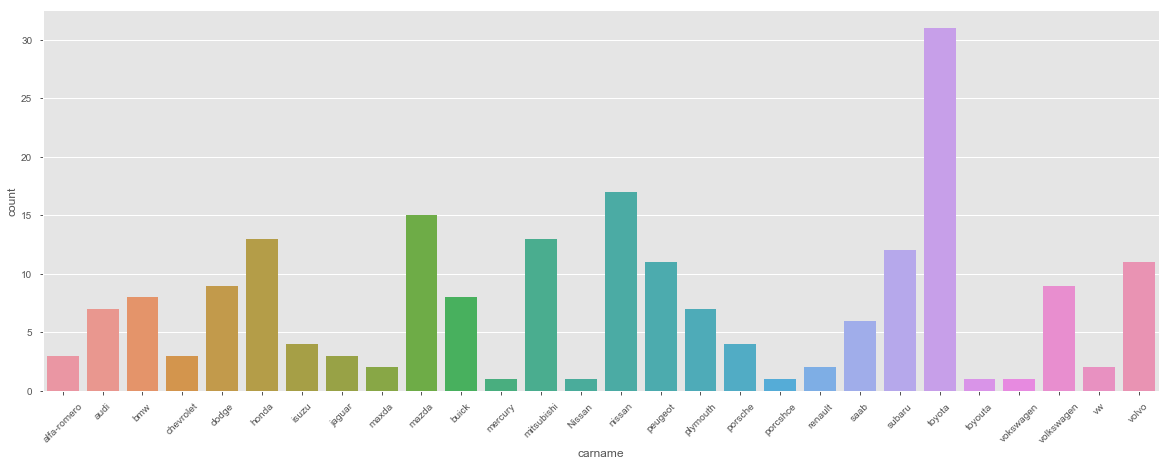

In [1840]:
#Let's plot bas plot to see more in depth in mis-spellings and casing difference
plt.figure(figsize=(20,7))
s = sns.countplot(car_price['carname'])
plt.xticks(rotation=45)

In [1841]:
#Seeing above result we can clearly conculde that we need to make the case consistent and also need to correct spelling of names
car_price['carname'] = car_price['carname'].str.lower()

In [1842]:
#correcting mispelled names
car_price['carname'] = car_price['carname'].str.replace('vw', 'volkswagen')
car_price['carname'] = car_price['carname'].str.replace('vokswagen', 'volkswagen')
car_price['carname'] = car_price['carname'].str.replace('toyouta', 'toyota')
car_price['carname'] = car_price['carname'].str.replace('porcshce', 'porsche')
car_price['carname'] = car_price['carname'].str.replace('maxda', 'mazda')

In [1843]:
car_price['carname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [1844]:
car_price.nunique().sort_values()

enginelocation        2
fueltype              2
aspiration            2
doornumber            2
drivewheel            3
carbody               5
symboling             6
enginetype            7
cylindernumber        7
fuelsystem            8
carname              22
peakrpm              23
citympg              29
highwaympg           30
compressionratio     32
stroke               37
boreratio            38
carwidth             44
enginesize           44
carheight            49
wheelbase            53
horsepower           59
carlength            75
curbweight          171
price               189
car_ID              205
dtype: int64

We now have enough idea about our data columns to convert it to their respective correct data types. Let's convert categorical variables to category dtype

In [1845]:
cat_vars = ['enginelocation', 'fueltype', 'aspiration', 'doornumber', 'drivewheel', 'cylindernumber', 'carbody', 'symboling',
           'enginetype', 'fuelsystem', 'carname']
car_price[cat_vars]=car_price[cat_vars].astype('category')
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null category
carname             205 non-null category
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-n

#### Now first visualize the data to quickly see the relation between all variables

<Figure size 3600x3600 with 0 Axes>

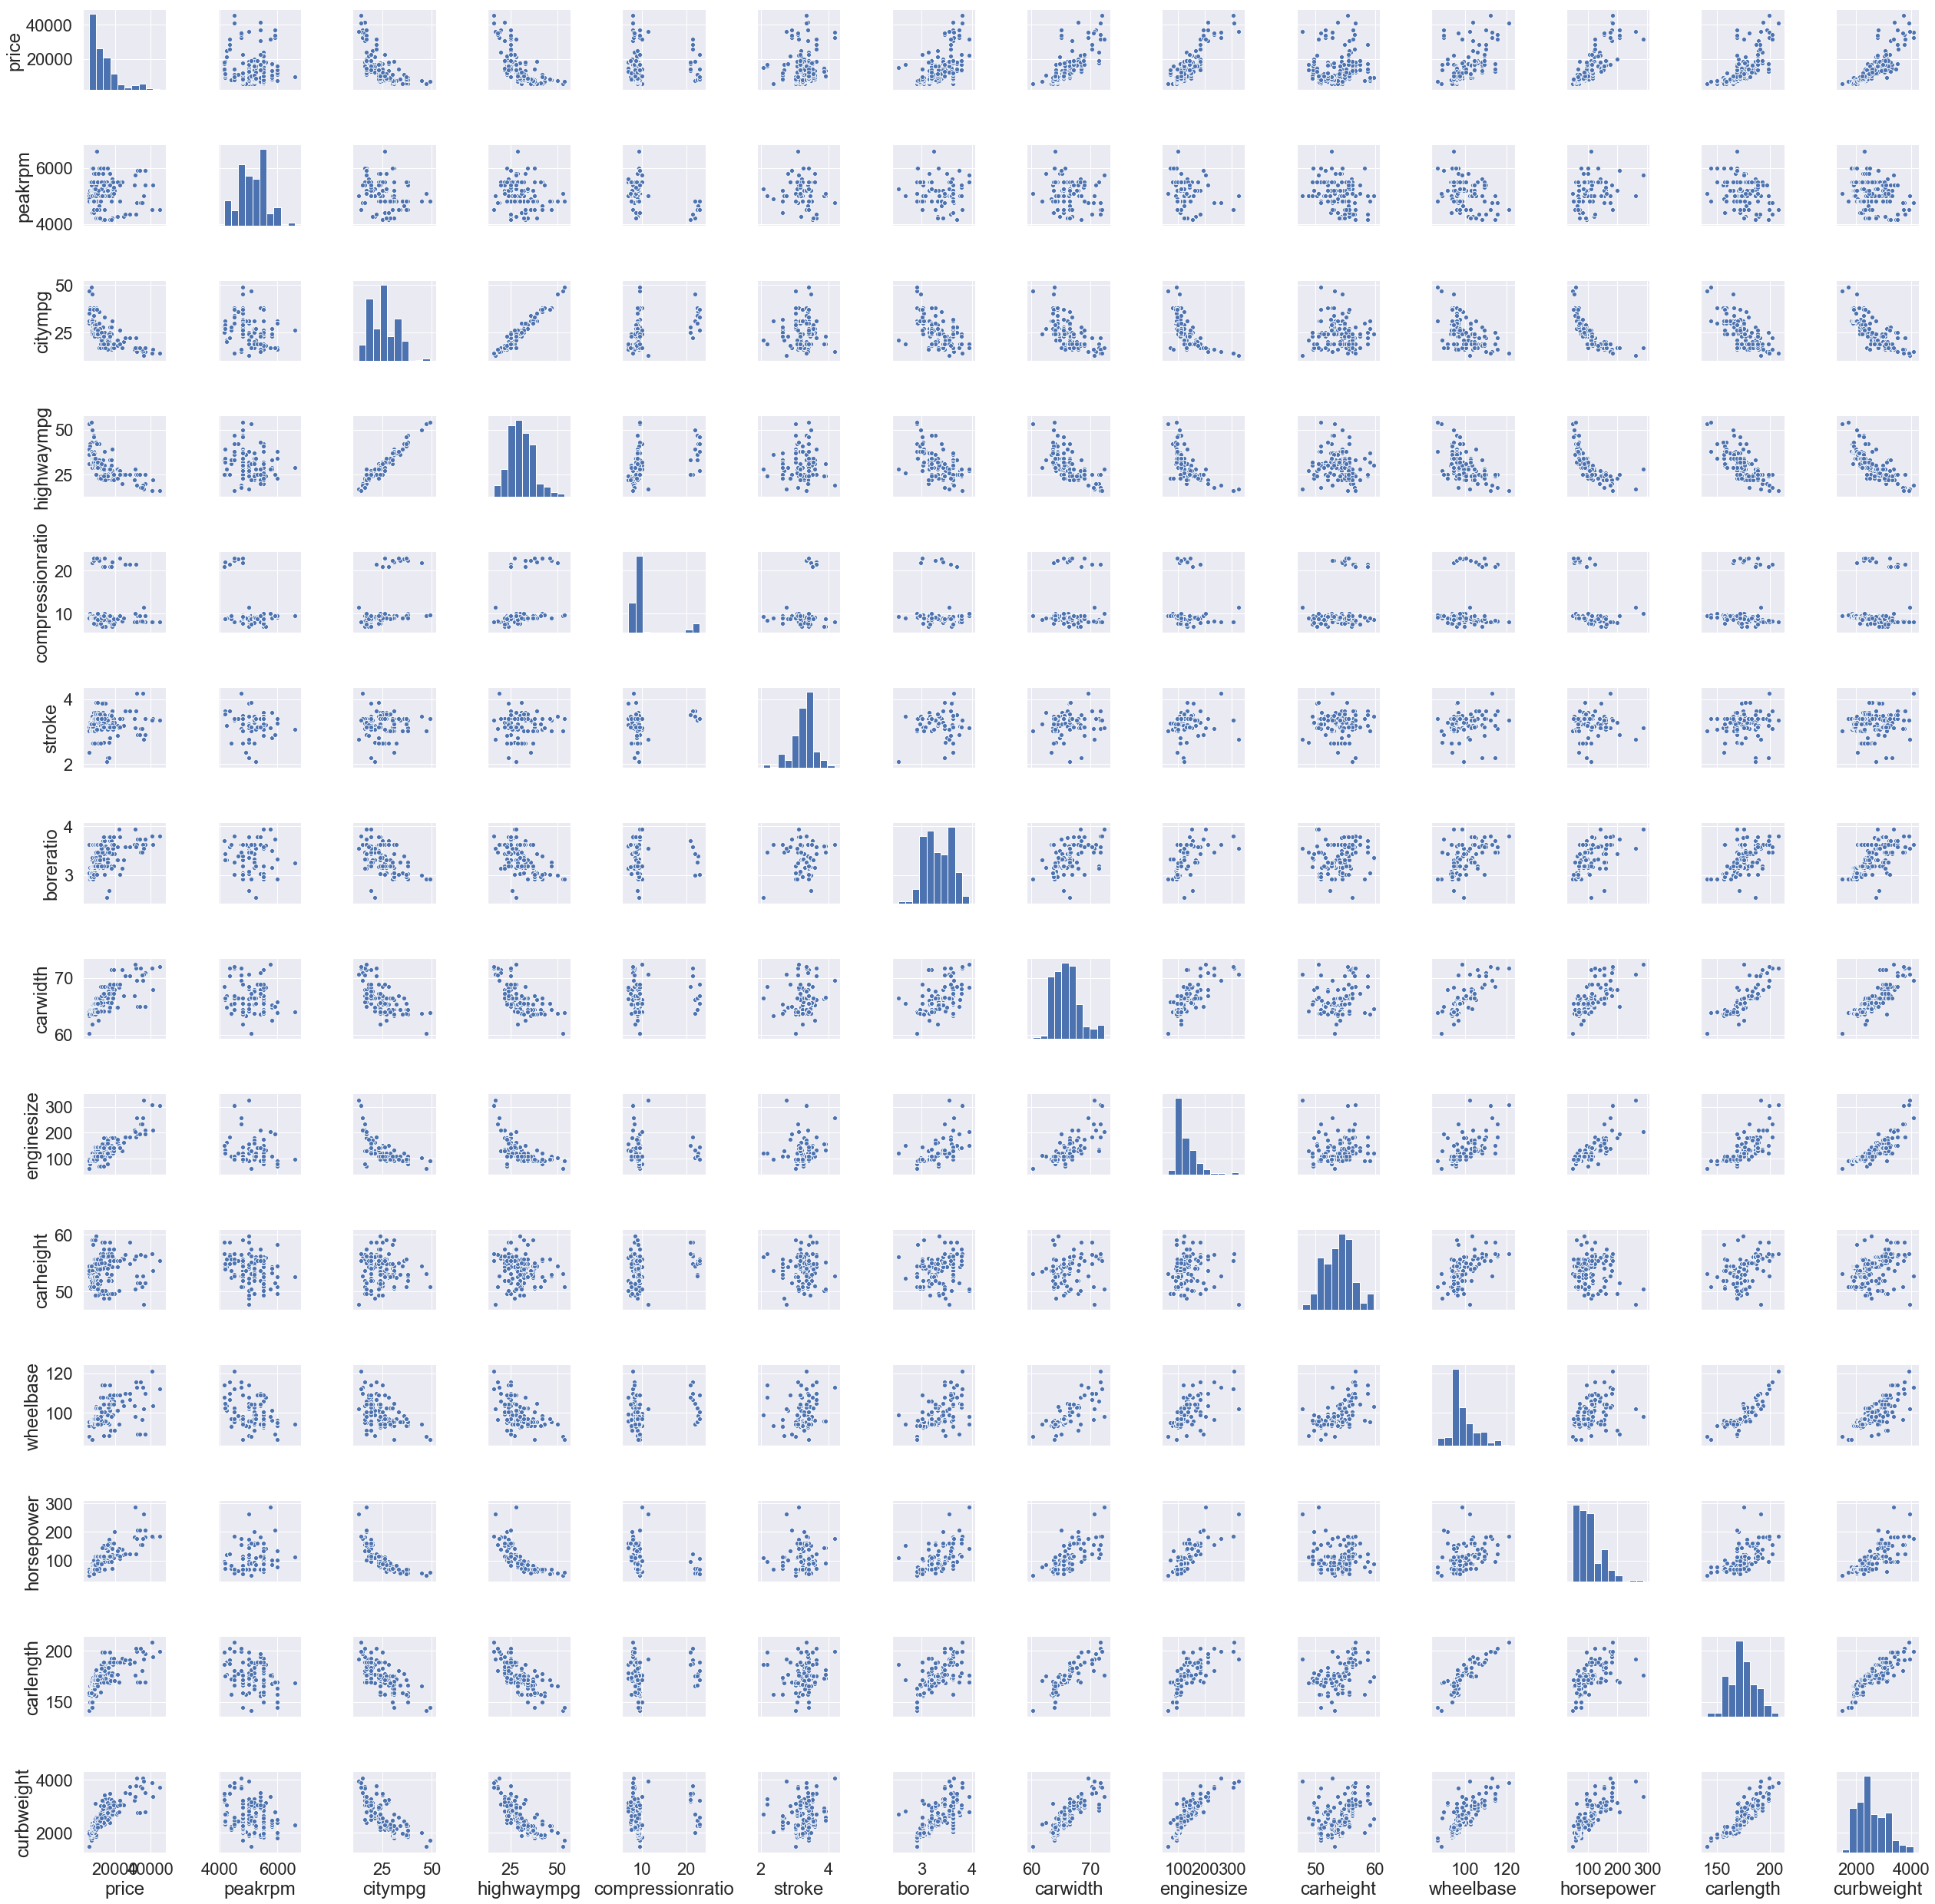

In [1846]:
num_vars = ['price', 'peakrpm', 'citympg', 'highwaympg', 'compressionratio', 'stroke', 'boreratio',
            'carwidth', 'enginesize', 'carheight', 'wheelbase', 'horsepower', 'carlength', 'curbweight']
plt.figure(figsize = (50,50))
sns.set(font_scale=2)
sns.pairplot(car_price[num_vars])
plt.show()

In [1847]:
plt.figure(figsize=(30, 30))
corr = car_price[num_vars].corr()
sns.heatmap(corr, annot=True, center=0.5)
plt.show()

#### Let's note down few observations between Price(dependent var) and independent variables from scatter plot and heat map
-  Price seems to be highly related to curbweight, carlength, horsepower, wheelbase, enginesize, carwidth, citympg and highwaympg. These variables might be our area of interest.
- citympg and highwaympg are highly corelated which seems to be obvious, taking both variables for modelling may introduce multicollinearity

In [1848]:
#as we have seen that citympg and highwaympg are highly correlated. It's better to drop one of them. Let's drop highwaympg
car_price.drop(columns=['highwaympg'], inplace=True)
car_price.columns

Index(['car_ID', 'symboling', 'carname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price'],
      dtype='object')

#### Using Pandas Profiler here to take a close and quick look at the variables

In [1849]:
pp.ProfileReport(car_price)

#### As per observations below are the list of numeric and categorical variables
| CATEGORICAL | NUMERICAL |
| --- | --- |
| fueltype | peakrpm |
| aspiration | citympg |
| doornumber | compressionratio |
| enginelocation | stroke |
| drivewheel | boreratio |
| carbody | carwidth |
| symboling | enginesize |
| enginetype | carheight |
| cylindernumber | wheelbase |
| CarName | horsepower |
| ----- | carlength |
| ----- | curbweight |

### Variable Analysis
- Boxplot to see their distribution and detecting outliers
- Scatterplot wrt to price to see if it is of interest or not(linear relationship)
- Outliers will be handled by min-max scaler later
#### Let's first start with numeric variables

In [1850]:
#defining some functions to avoid repetitive code
#plot_carvar will plot boxplot of numeric variable and also it's scatter plot with price
def plot_var_num(target_column):
    corr_val = round(car_price['price'].corr(car_price[target_column]),2)
    print('Correlation value with price: {}'.format(corr_val))
    plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    sns.boxplot(y=car_price[target_column])
    plt.subplot(1,2,2)
    sns.scatterplot(car_price[target_column],car_price['price'])
    plt.show()
    
predictor_vars = []

#### Peakrpm

Correlation value with price: -0.09


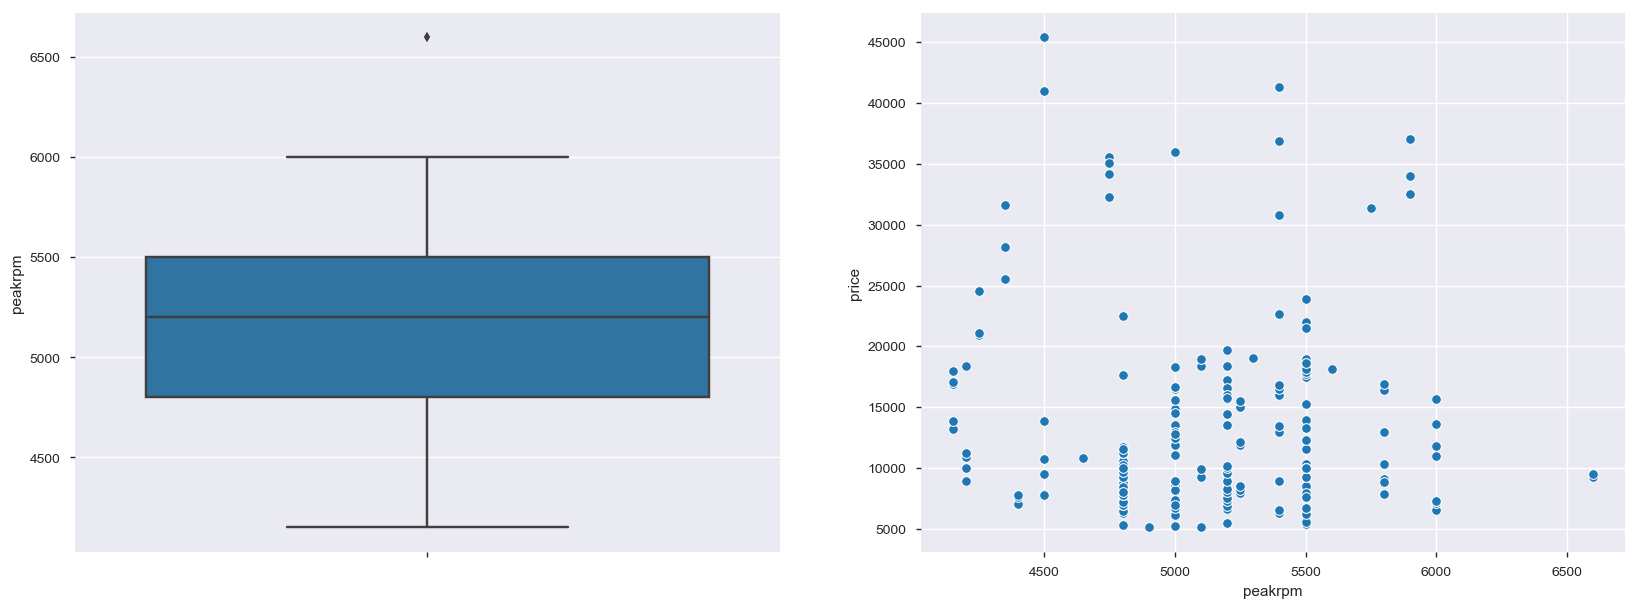

In [1851]:
plot_var_num('peakrpm')

Peakrpm does not seems to be of interest as it's corelation value is not significant and also it's evident from scatter plot.

#### Citympg

Correlation value with price: -0.69


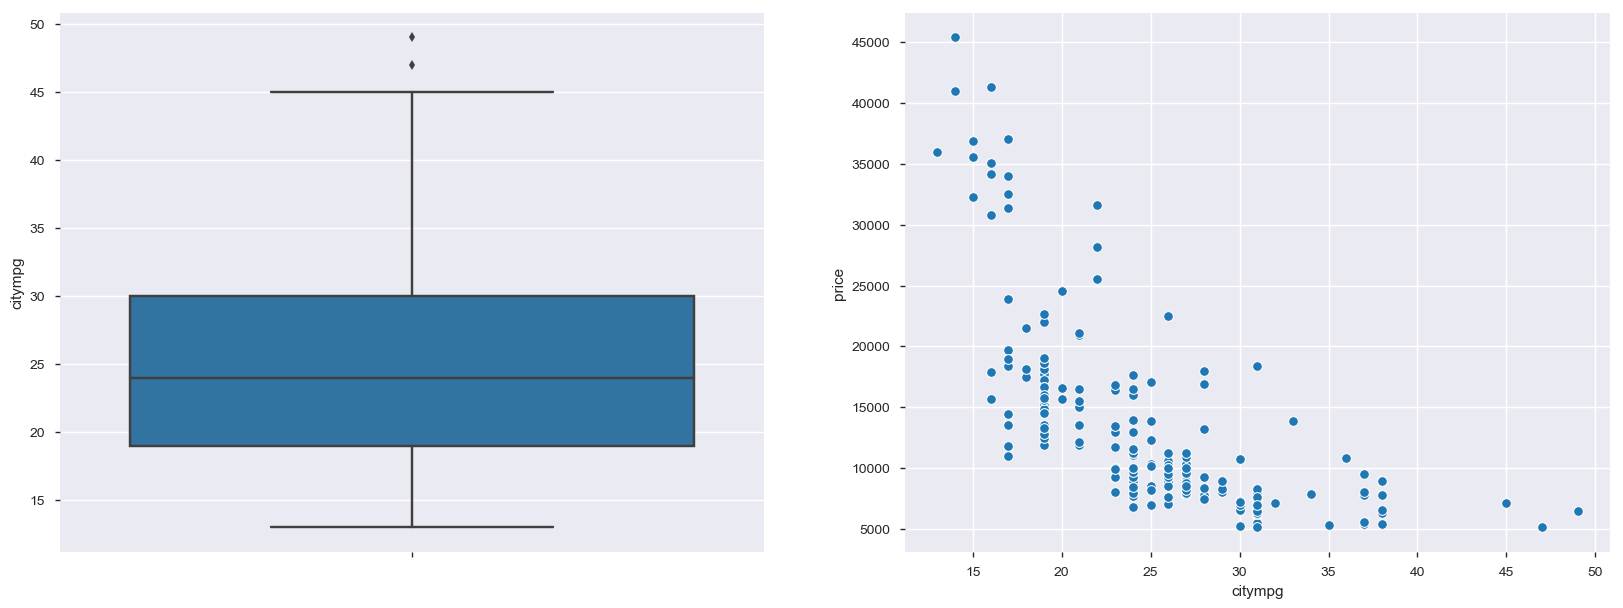

In [1852]:
plot_var_num('citympg')

It's seems to be significant with considerable correlation value and depicts some inverse relationship with car price

In [1853]:
#adding it to our variables of interest
predictor_vars.append('citympg')

#### CompressionRatio

Correlation value with price: 0.07


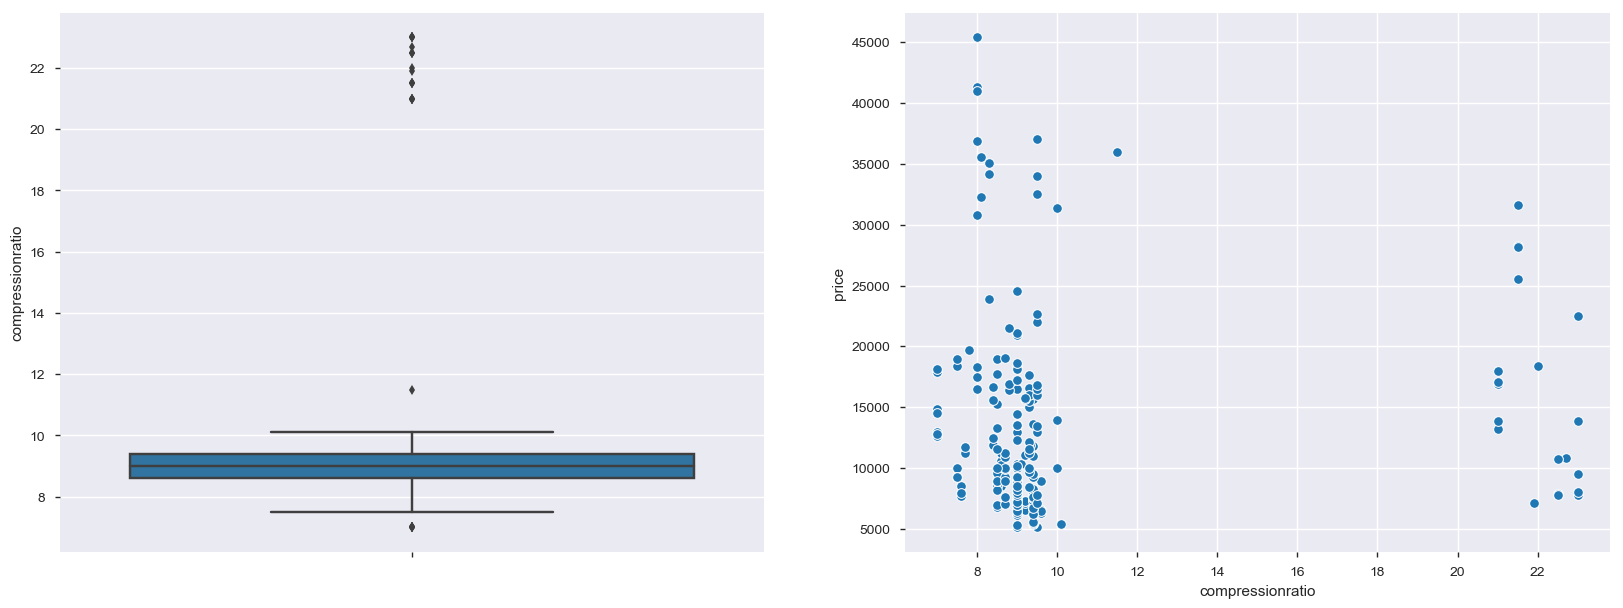

In [1854]:
plot_var_num('compressionratio')

We can see that it seems not significant with low corr value and also doesn't depicts any linear relationship with price

#### Stroke

In [1855]:
plot_var_num('stroke')

Correlation value with price: 0.08


Same goes for Stroke, seems not significant

#### BoreRatio

In [1856]:
plot_var_num('boreratio')

Correlation value with price: 0.55


Not very much high corr value but enough to consider it now, we will drop it later from our model it it will have high p-value and VIF.

In [1857]:
#adding it to variables of interest
predictor_vars.append('boreratio')

#### CarWidth

Correlation value with price: 0.76


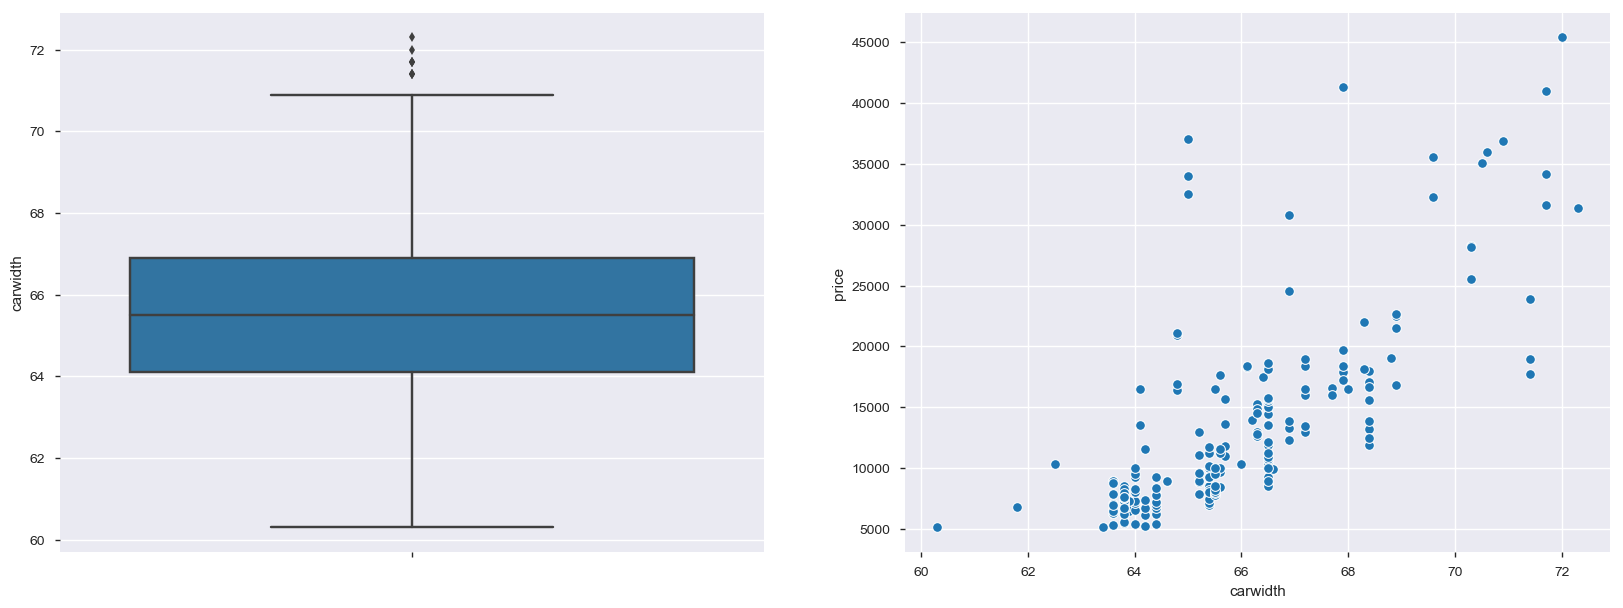

In [1858]:
plot_var_num('carwidth')

Corr value is high enough to consider it as our independent variable, also this variable has some outliers we will remove them and add it to out list

In [1859]:
predictor_vars.append('carwidth')

#### CarHeight

Correlation value with price: 0.12


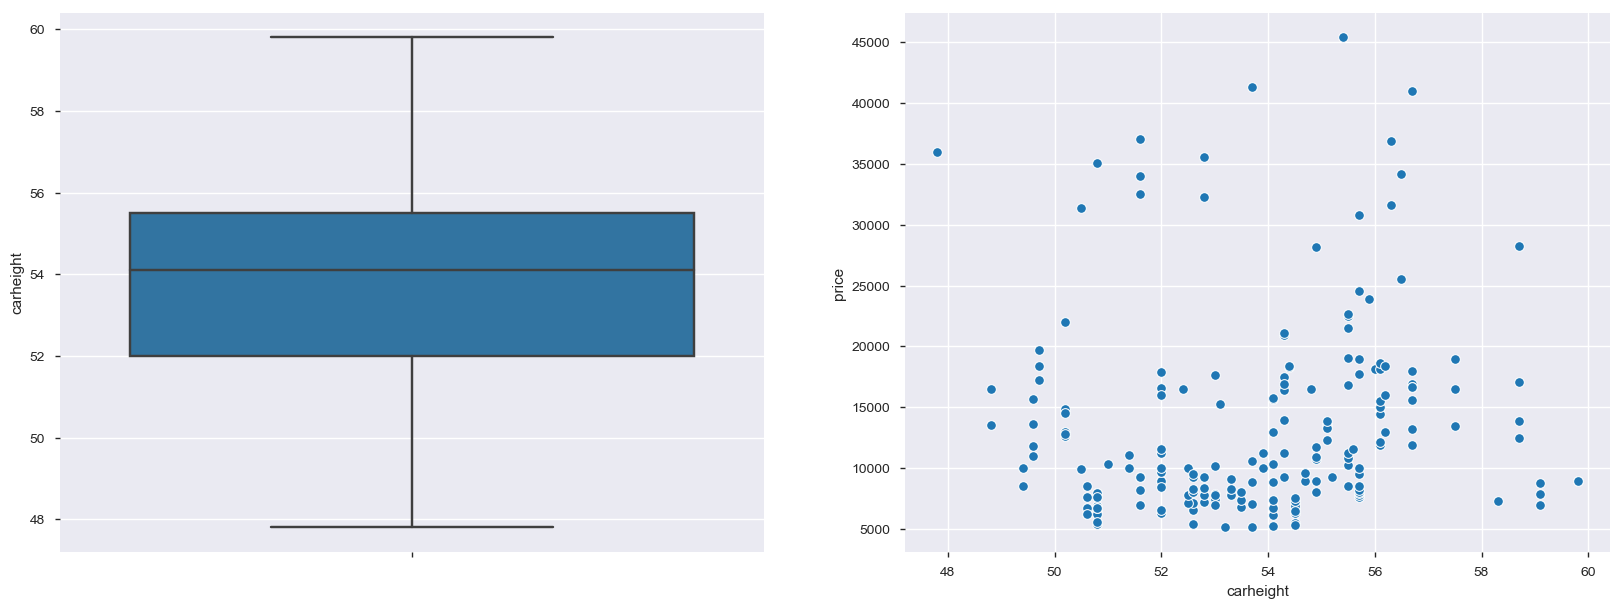

In [1860]:
plot_var_num('carheight')

It's not significant with low corr value and also it's evident from scatter plot

#### CarLength

Correlation value with price: 0.68


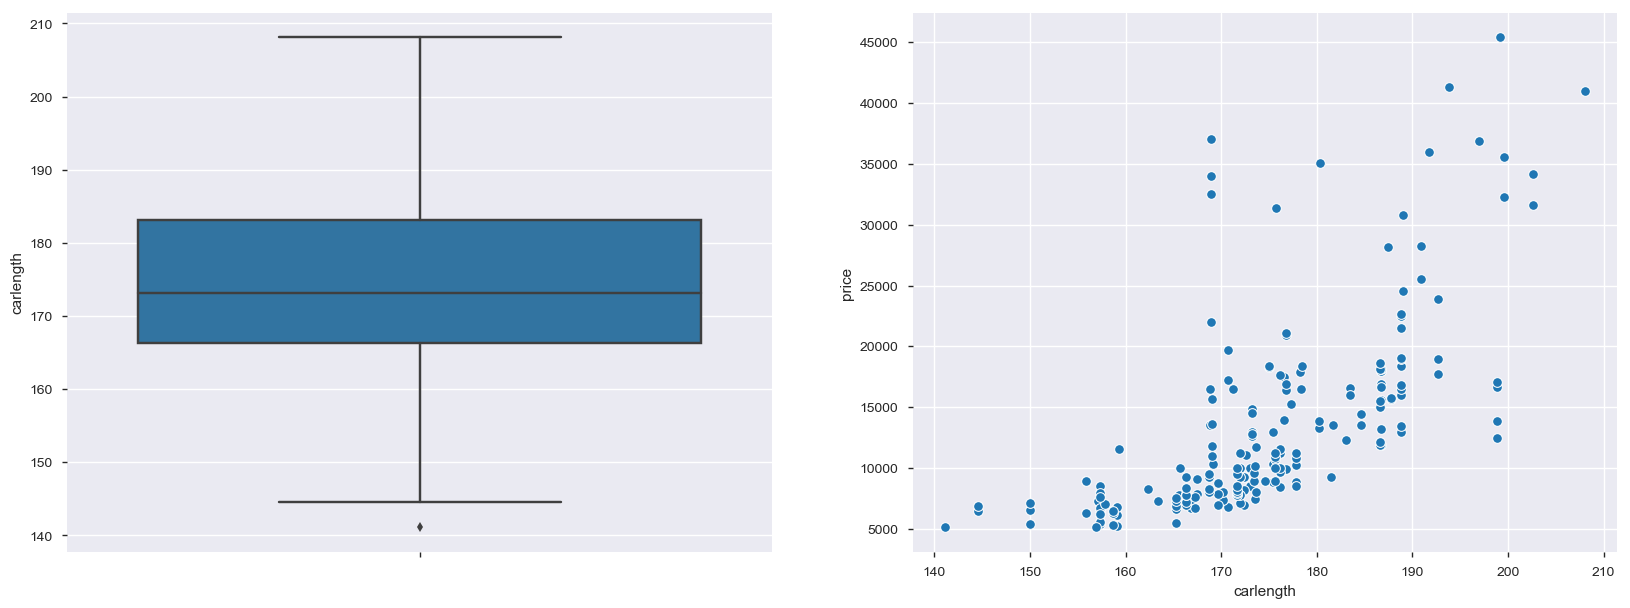

In [1861]:
plot_var_num('carlength')

Seems significant with high corr value and some extent of linear relationship with car price.
Also has small number of outliers, we will remove them next.

In [1862]:
#removing outliers
predictor_vars.append('carlength')

#### EngineSize

Correlation value with price: 0.87


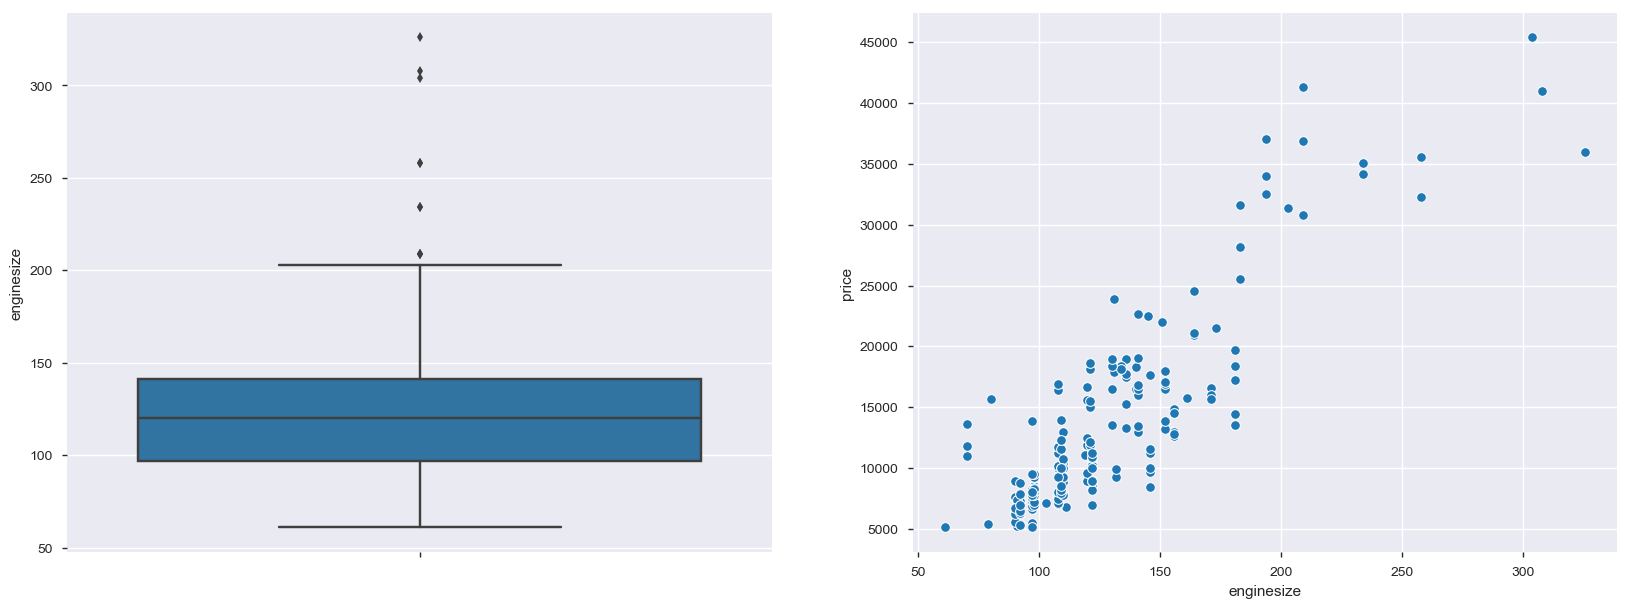

In [1863]:
plot_var_num('enginesize')

Corr value is high and depicting linear relationship. let's remove outliers

In [1864]:
predictor_vars.append('enginesize')

#### Wheelbase

Correlation value with price: 0.58


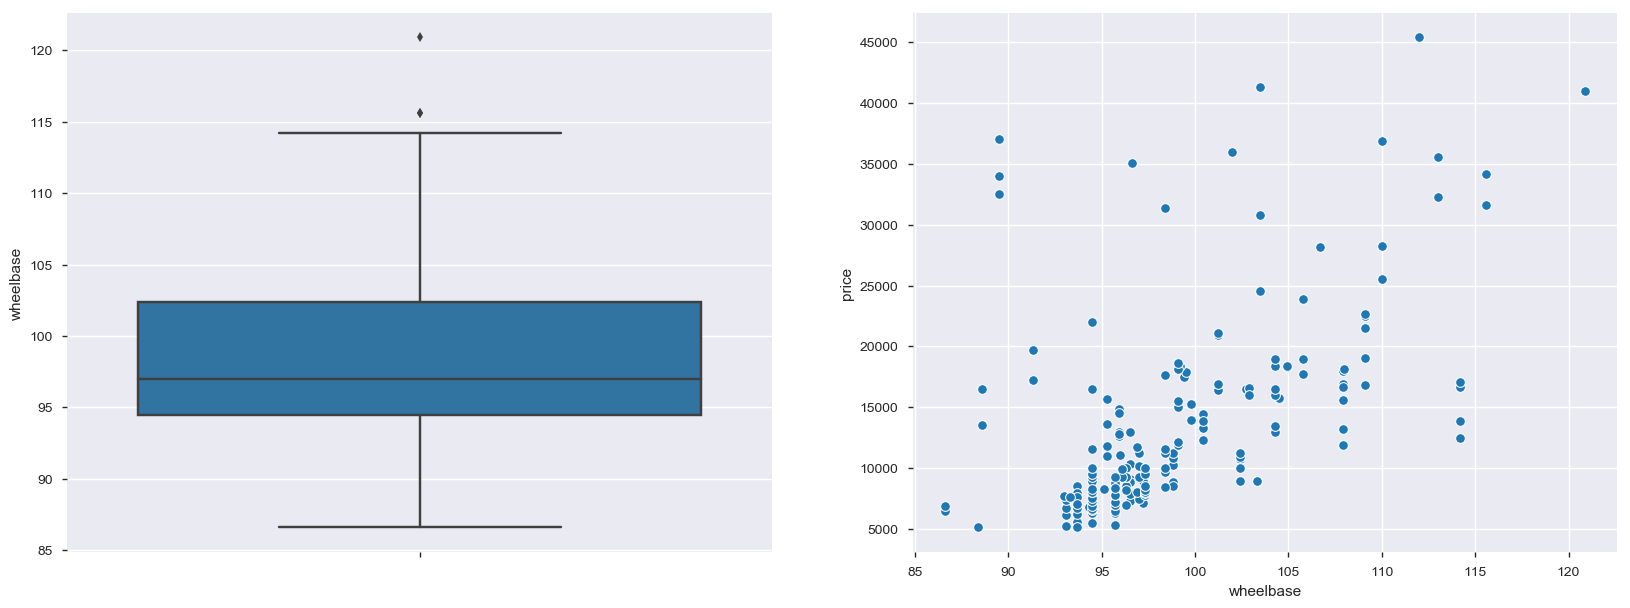

In [1865]:
plot_var_num('wheelbase')

Not sure now to consider it or not, let's keep it for now and we will see it's effect later on model building.

In [1866]:
predictor_vars.append('wheelbase')

#### HorsePower

Correlation value with price: 0.81


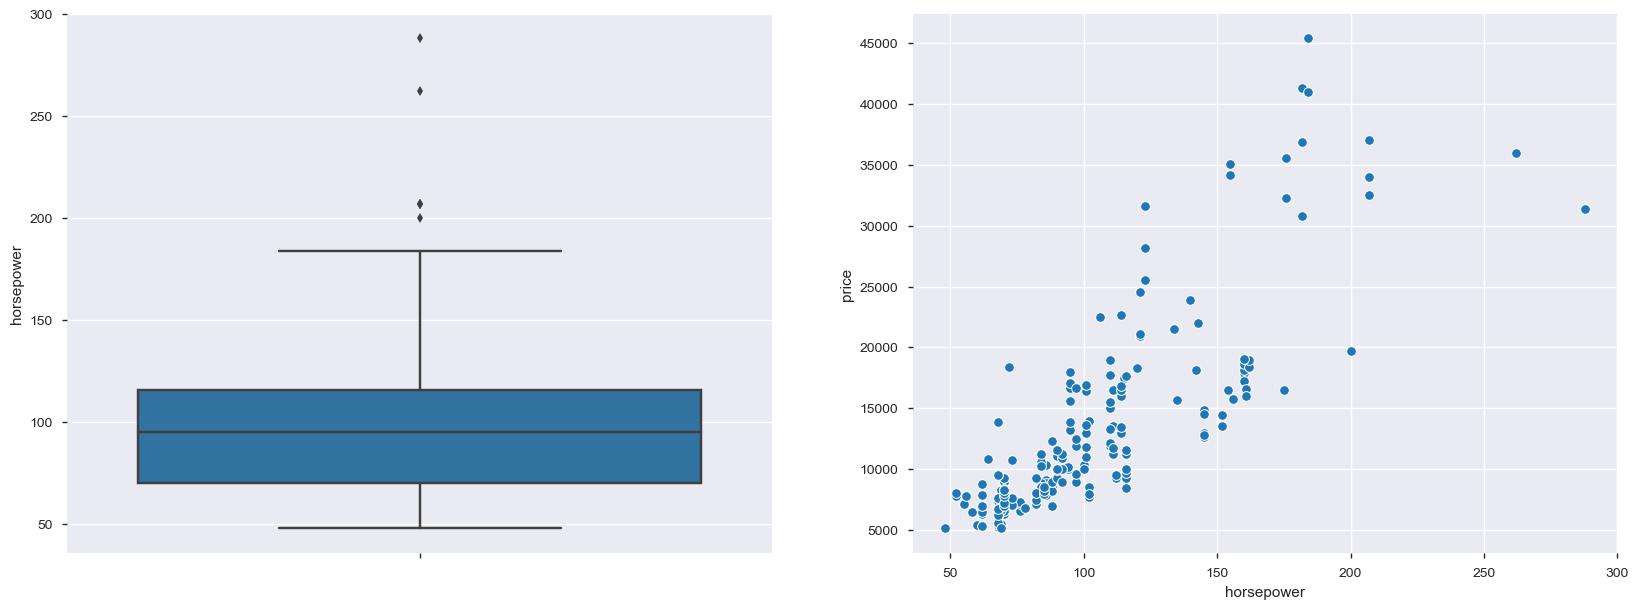

In [1867]:
plot_var_num('horsepower')

Seems significant with corr value 0.8, let's remove outliers

In [1868]:
predictor_vars.append('horsepower')

#### CurbWeight

Correlation value with price: 0.84


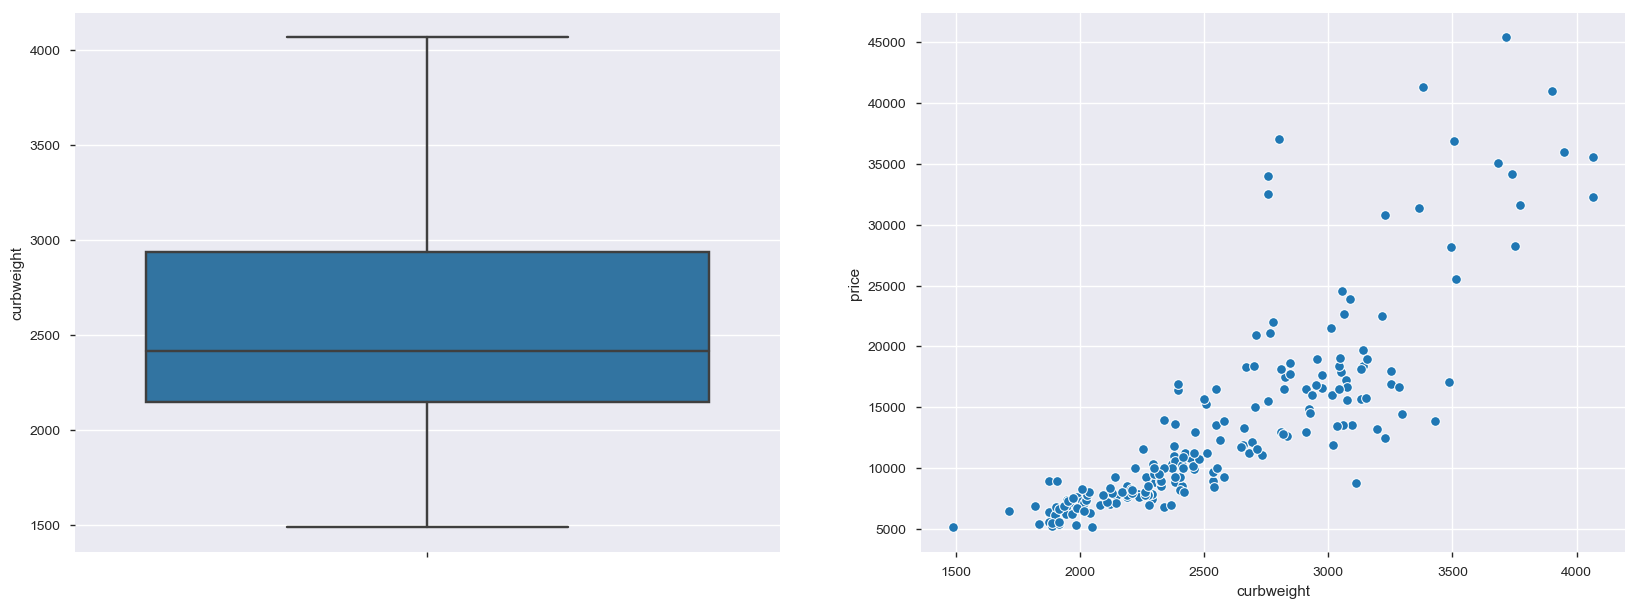

In [1869]:
plot_var_num('curbweight')

Seems highly correlated

In [1870]:
predictor_vars.append('curbweight')

#### Price Vs Categorical variables
- fueltype-2
- aspiration-2
- doornumber-2
- enginelocation-2
- drivewheel-3
- carbody-5
- symboling-6
- enginetype-7
- cylindernumber-7
- fuelsystem-8

In [1871]:
#defining function for plotting the distribution of categorical variable and their count
def plot_categorical_var(target_column):
    plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    sns.boxplot(x = target_column, y = 'price', data = car_price)
    plt.subplot(1,2,2)
    sns.countplot(car_price[target_column])
    plt.show()

#### Fueltype

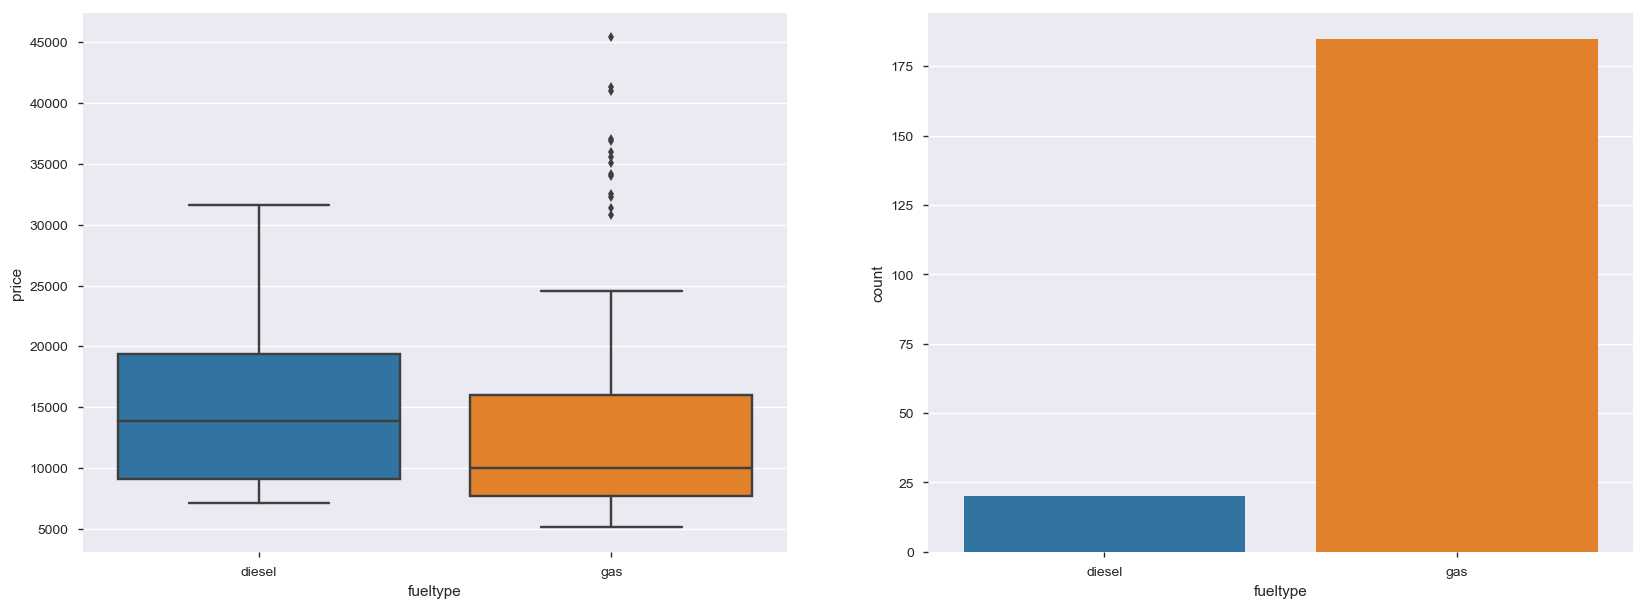

In [1872]:
plot_categorical_var('fueltype')

In [1873]:
#as we can see price is more for diesel fuel type, but diesel fuletype is very less as compared to gas fuel type
#let's take this variable for now, we will filter it out later by using RFE or analysing p-value or VIF.
predictor_vars.append('fueltype')

#### Aspiration

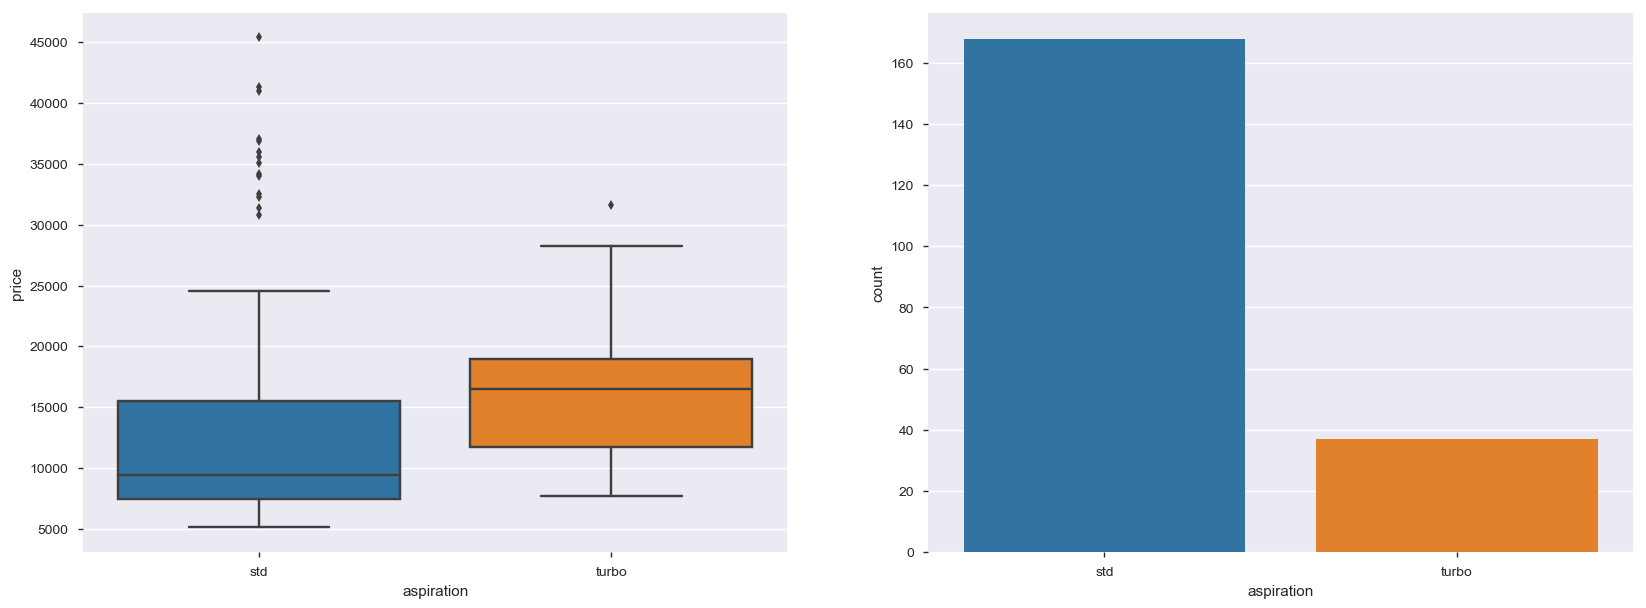

In [1874]:
plot_categorical_var('aspiration')

Similar obs here also, price is high for turbo aspiration but turbo frequency is less as compared to std

In [1875]:
#including this var
predictor_vars.append('aspiration')

#### DoorNumber

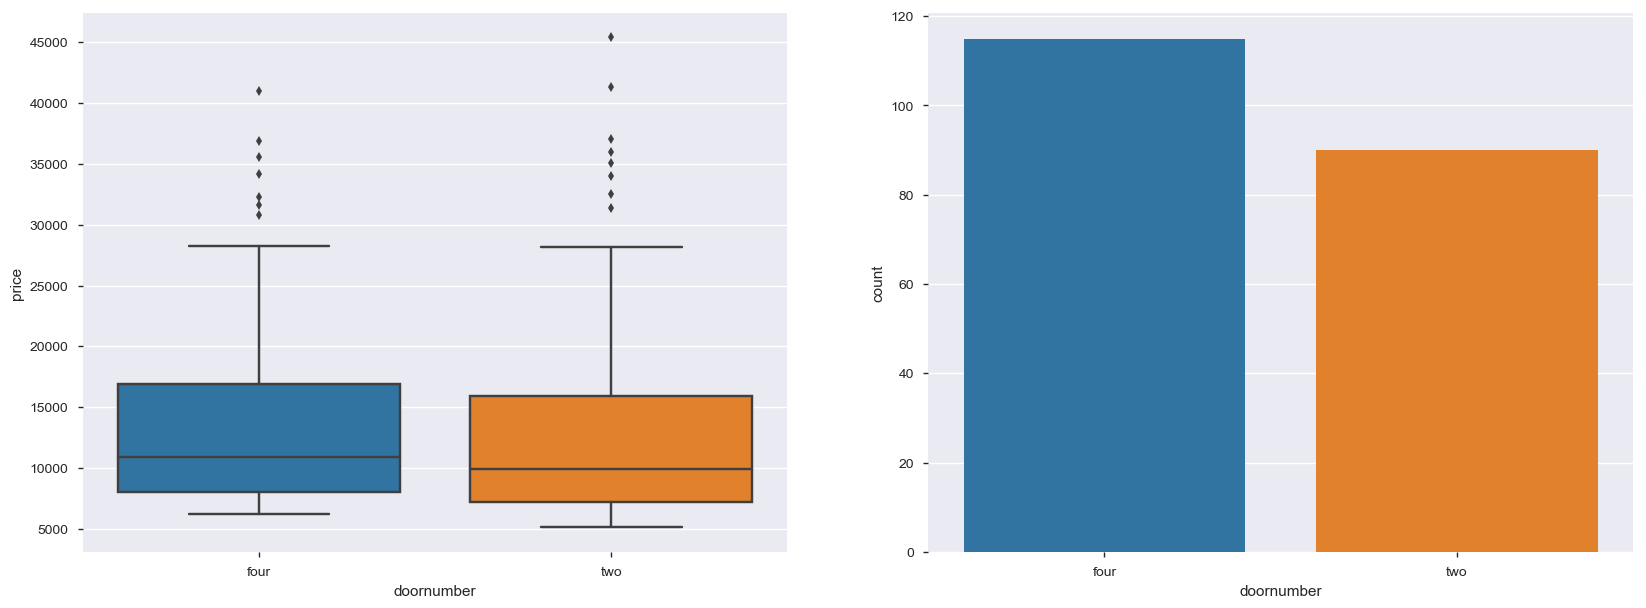

In [1876]:
plot_categorical_var('doornumber')

Here we can see price is not fluctuating as per the doornumber, hence we won't take this as our predictor variable.

#### EngineLocation

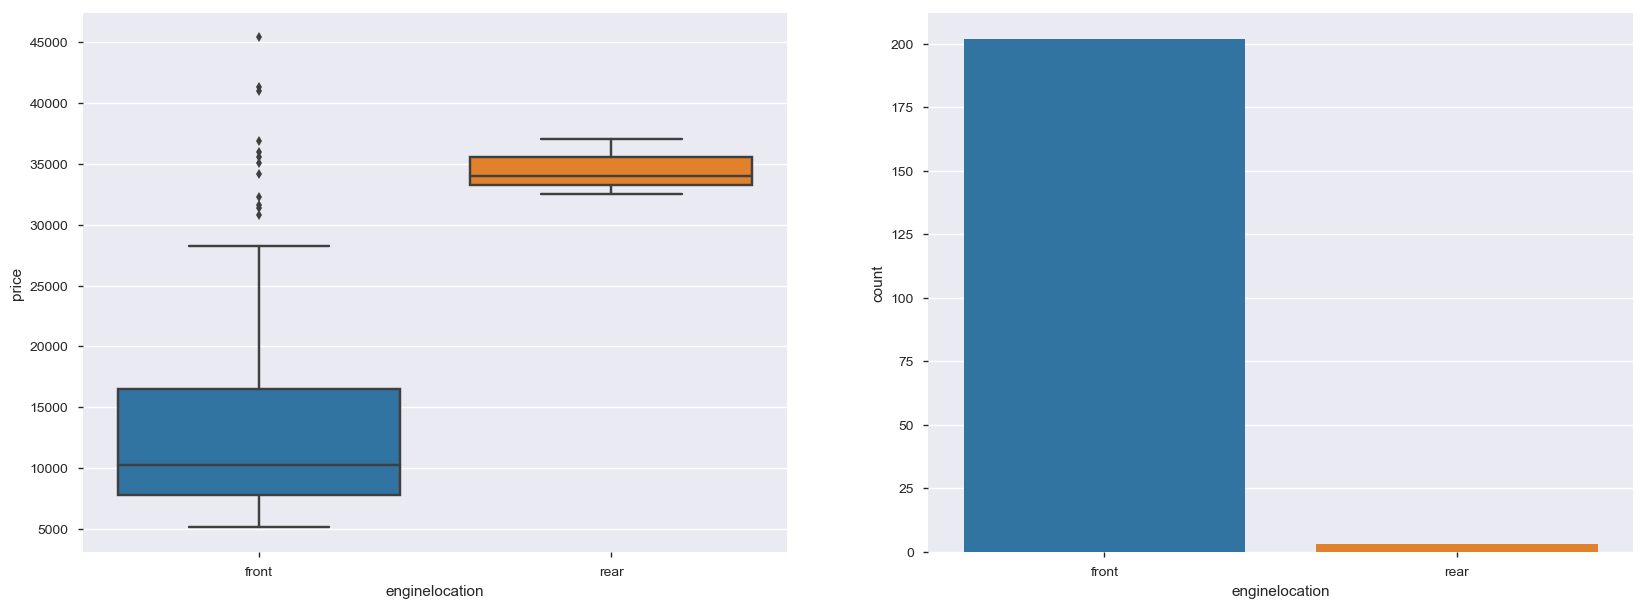

In [1877]:
plot_categorical_var('enginelocation')

Rear engine location has significantly high prices. Hence considering it as predictor variable.

In [1878]:
predictor_vars.append('enginelocation')

#### DriveWheel

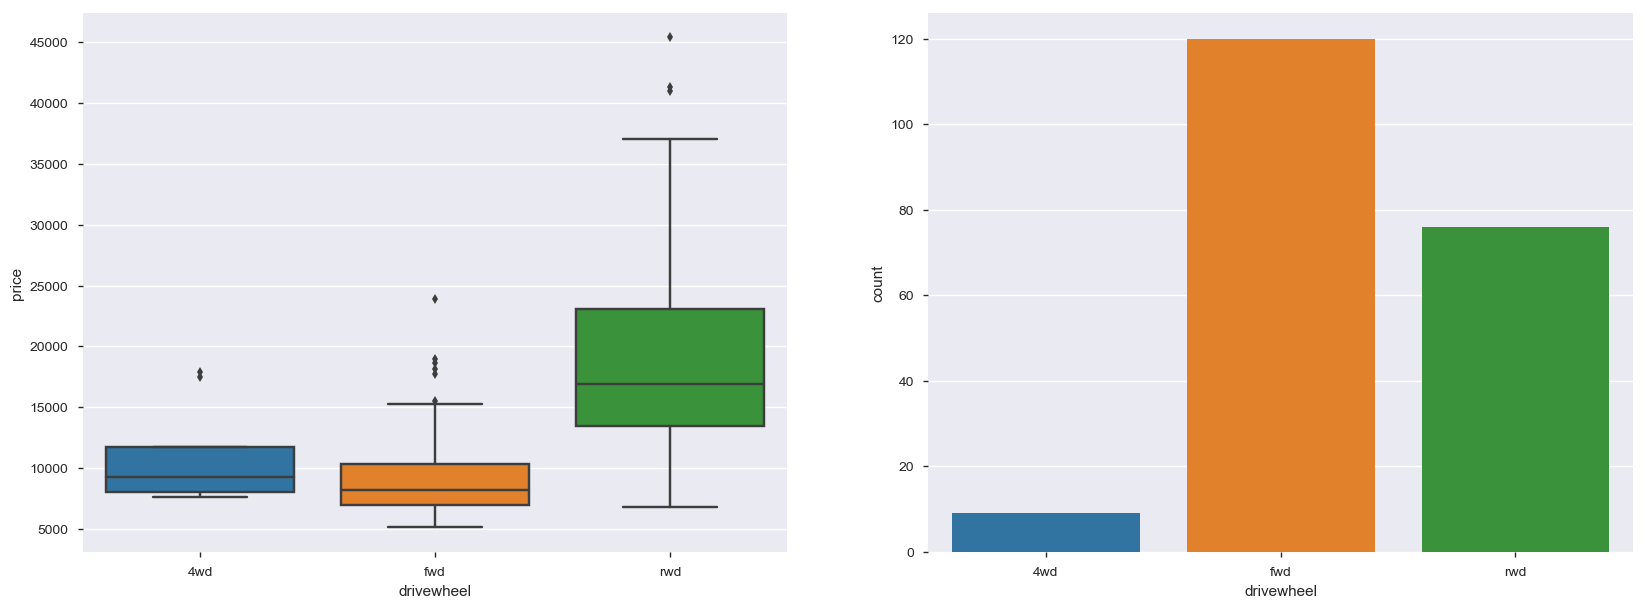

In [1879]:
plot_categorical_var('drivewheel')

Price is high for rwd, there is some relation. 

In [1880]:
predictor_vars.append('drivewheel')

#### CarBody

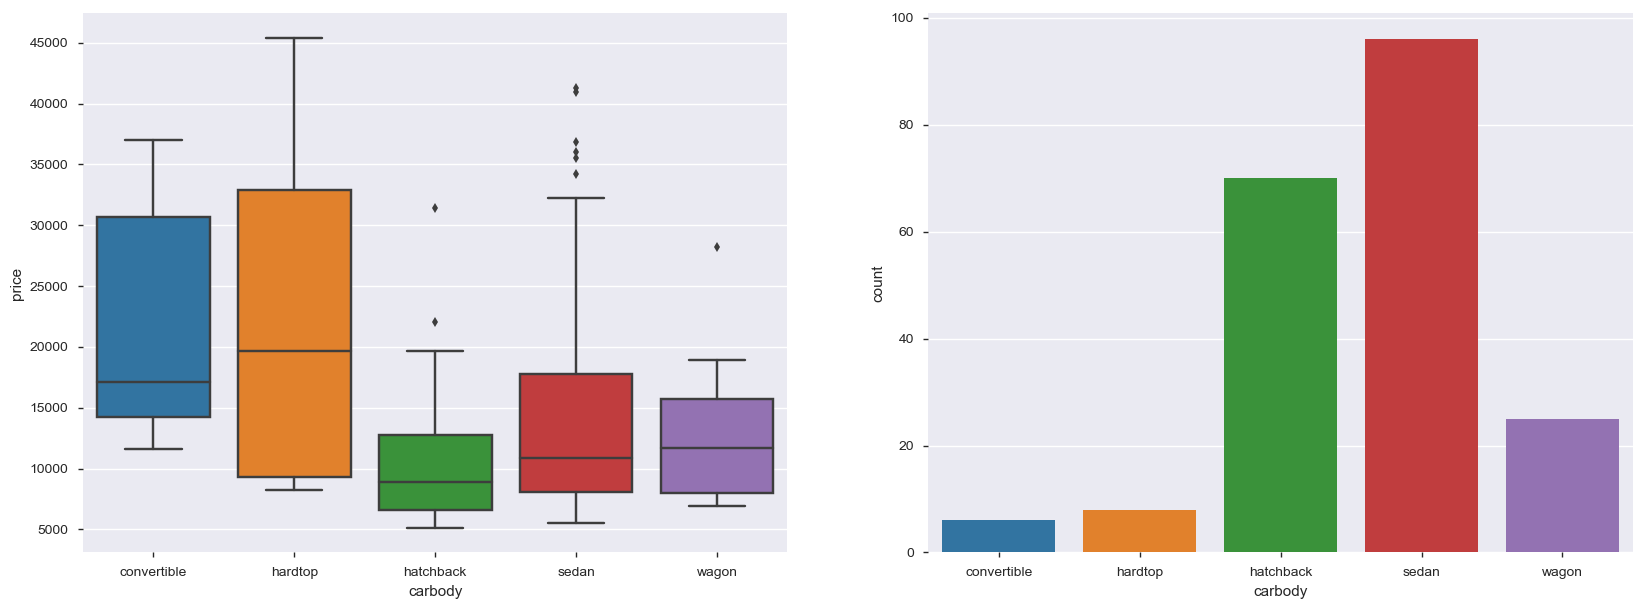

In [1881]:
plot_categorical_var('carbody')

Let's consider this var, we will analyse later and drop some categories as per our observations from RFE and p-values

In [1882]:
predictor_vars.append('carbody')

#### Symboling

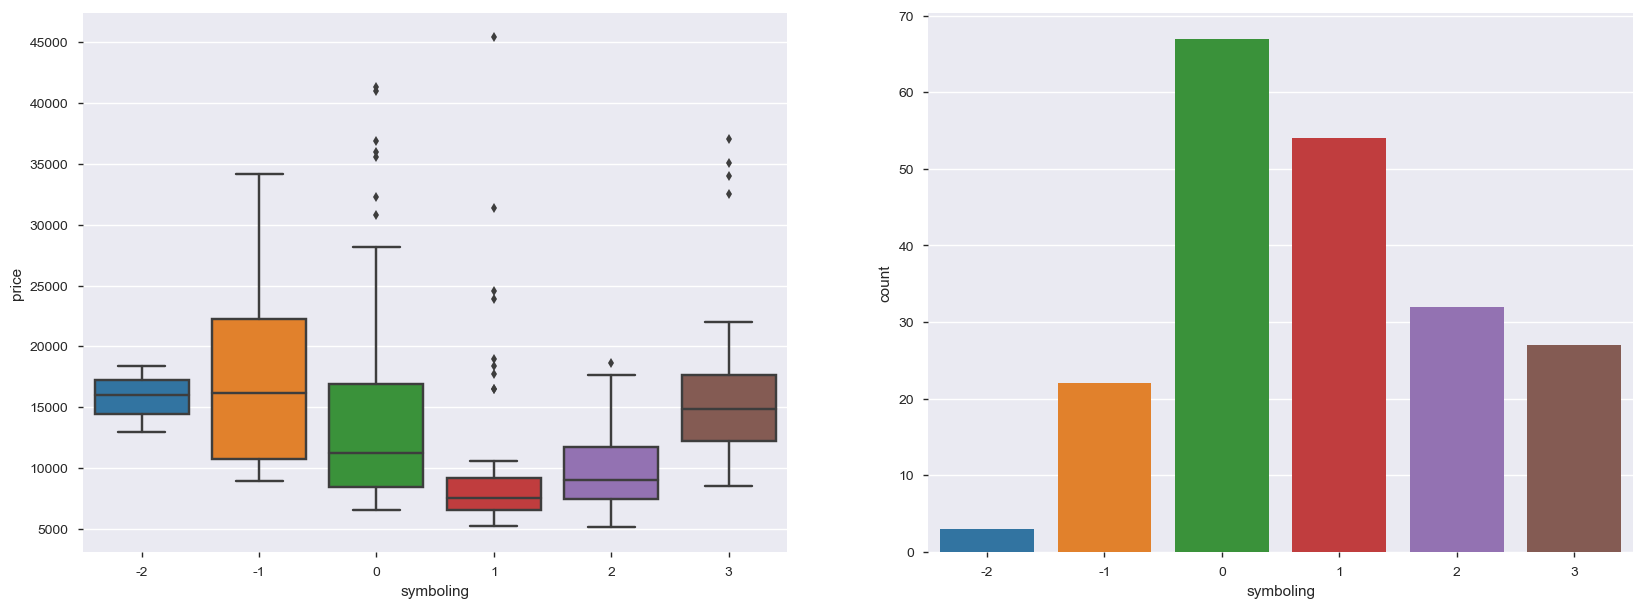

In [1883]:
plot_categorical_var('symboling')

Symboling is assigned insurance risk rating, we can see price is high for less risky rating.

In [1884]:
predictor_vars.append('symboling')

#### EngineType

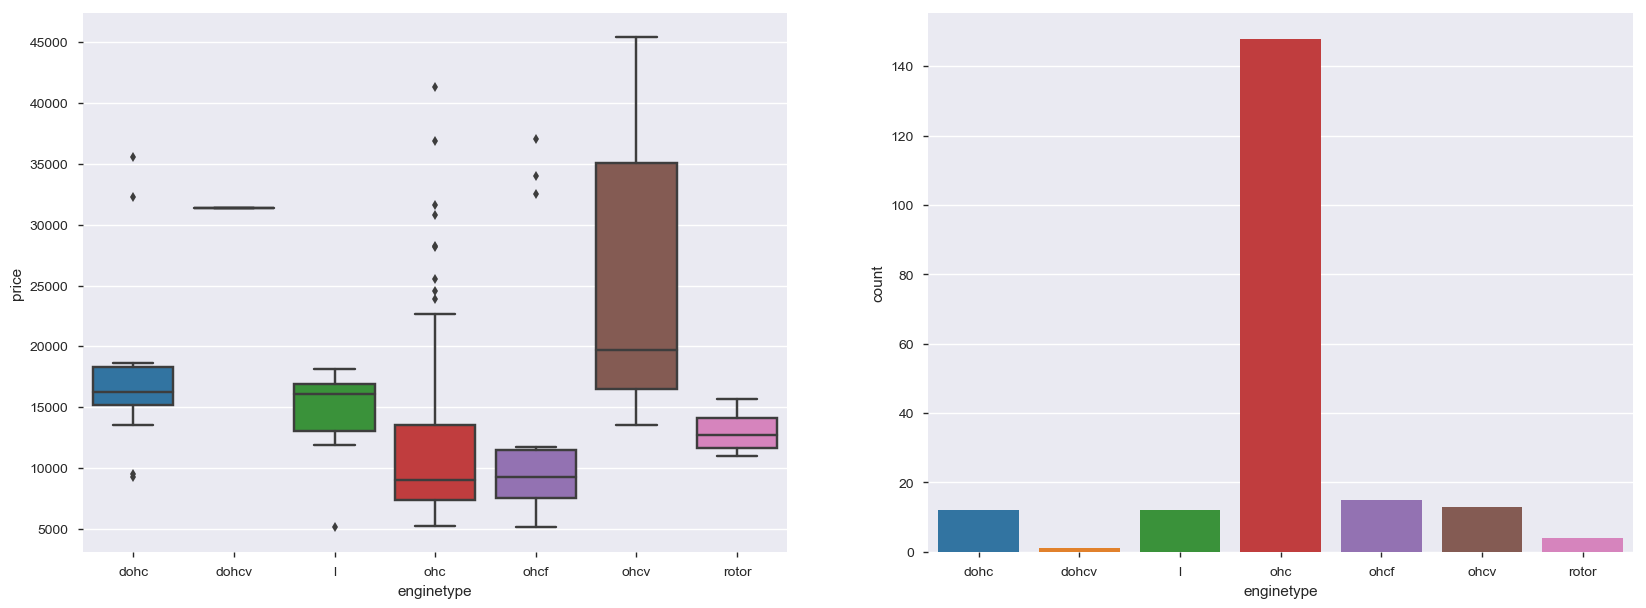

In [1885]:
plot_categorical_var('enginetype')

Not sure about the relation of engine type with price now, we will see later 

In [1886]:
predictor_vars.append('enginetype')

#### CylinderNumber

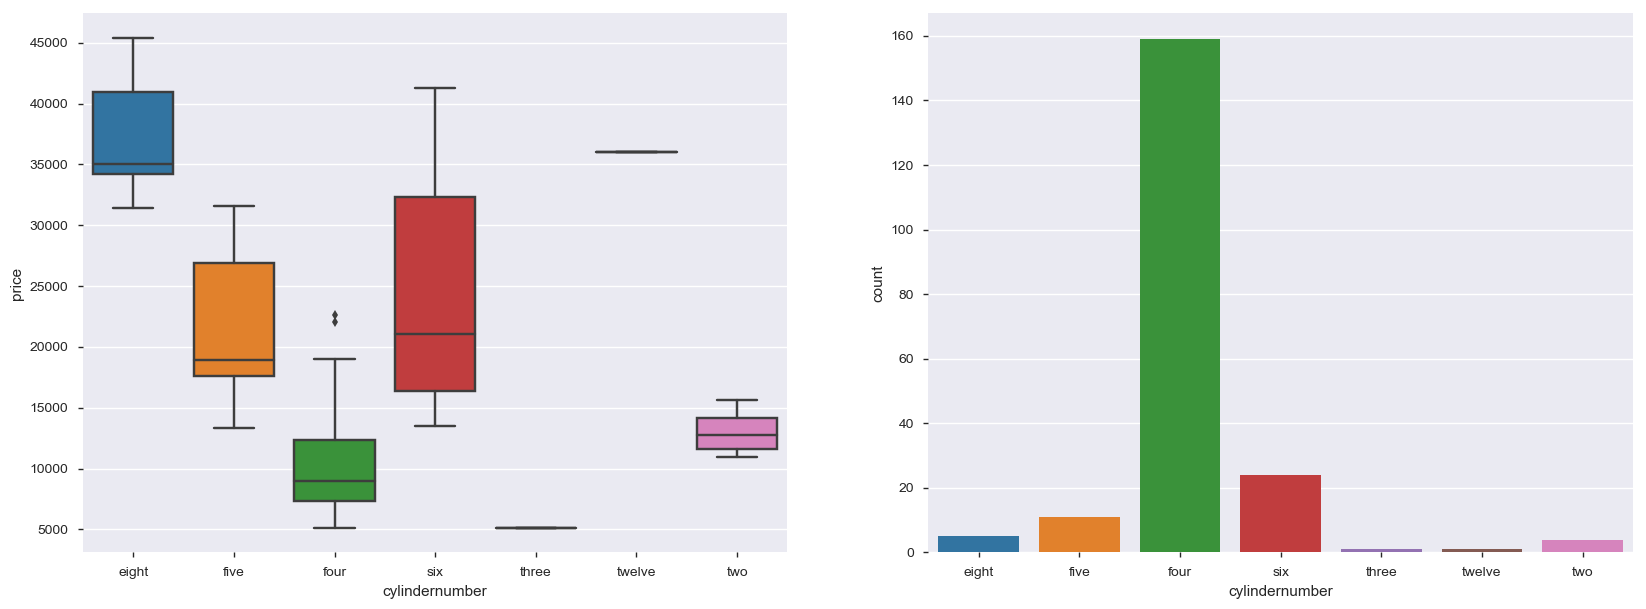

In [1887]:
plot_categorical_var('cylindernumber')

Same observation, lets take it we will analyse later in RFE and using model

In [1888]:
predictor_vars.append('cylindernumber')

#### Fuelsystem

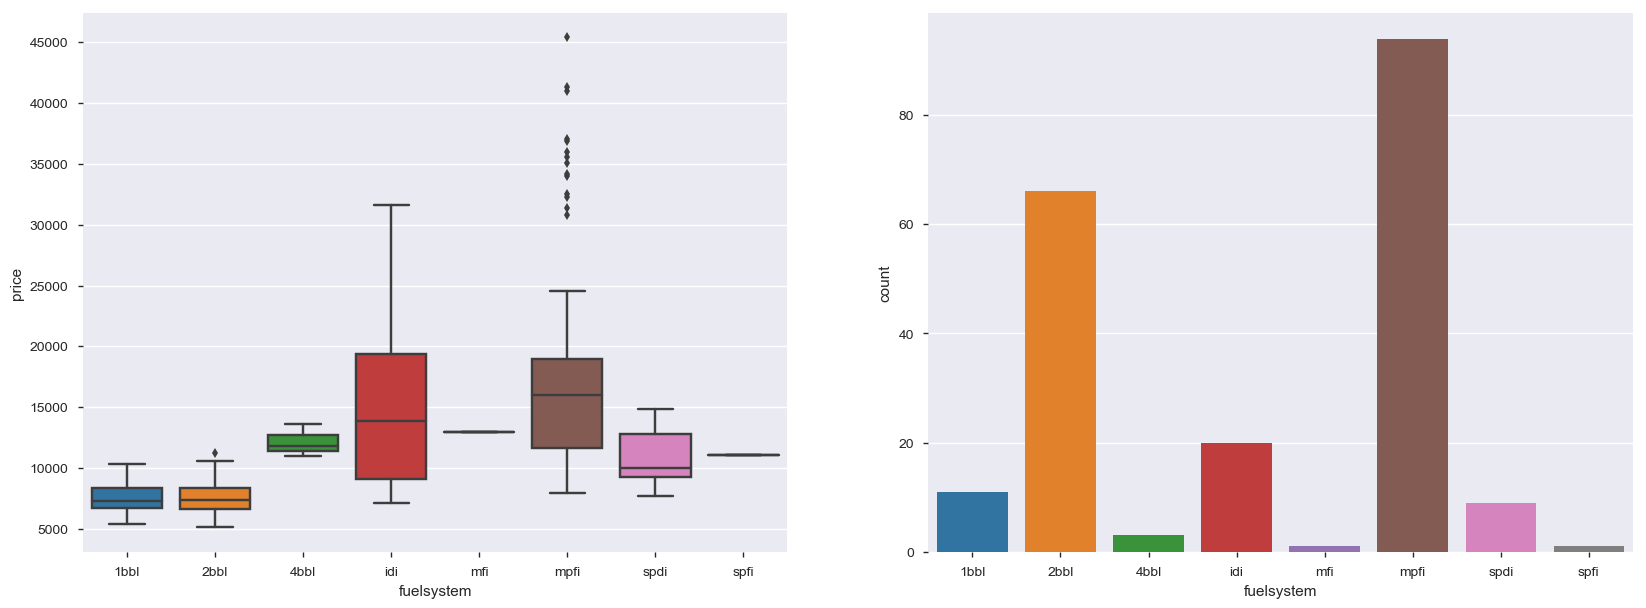

In [1889]:
plot_categorical_var('fuelsystem')

Some fuel system  has price and count also, let take it now and we will drop other categories using RFE and other methods

In [1890]:
predictor_vars.append('fuelsystem')

#### CarName

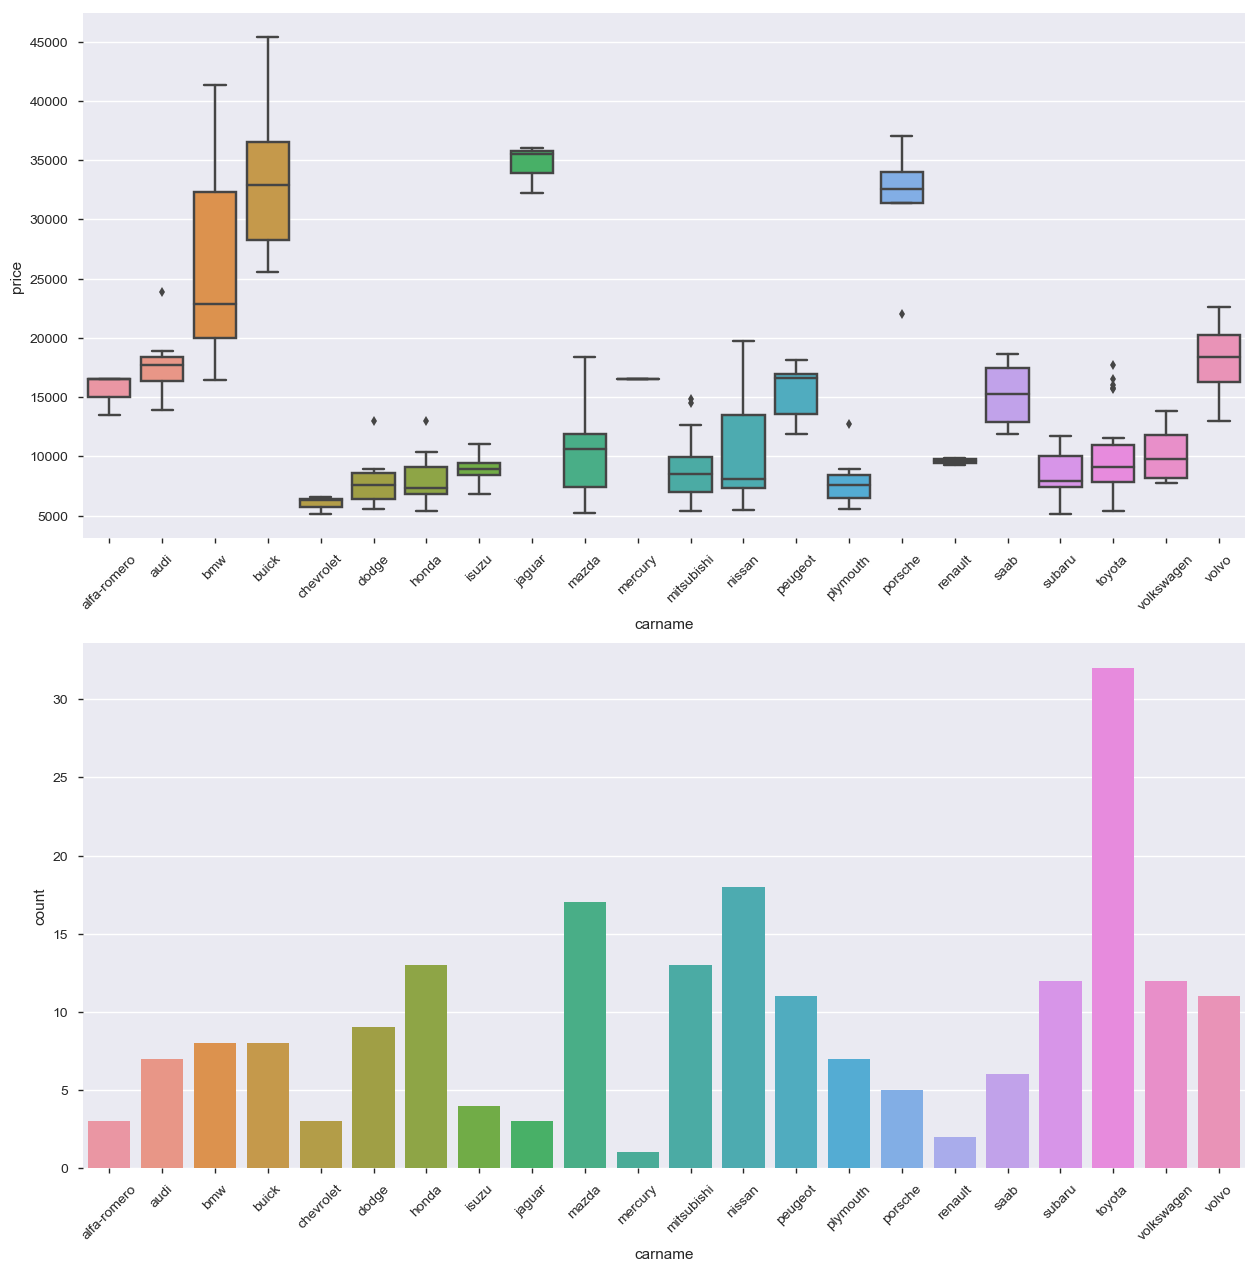

In [1891]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x = 'carname', y = 'price', data = car_price)
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.countplot(car_price['carname'])
plt.xticks(rotation=45)
plt.show()

Let's take CarName for now, we will see it in RFE

In [1892]:
predictor_vars.append('carname')

In [1893]:
#just to make sure, let's remove the duplicates columns if any in our interest list
predictor_vars = list( dict.fromkeys(predictor_vars) )
print(predictor_vars)

['citympg', 'boreratio', 'carwidth', 'carlength', 'enginesize', 'wheelbase', 'horsepower', 'curbweight', 'fueltype', 'aspiration', 'enginelocation', 'drivewheel', 'carbody', 'symboling', 'enginetype', 'cylindernumber', 'fuelsystem', 'carname']


In [1894]:
car_price[predictor_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
citympg           205 non-null int64
boreratio         205 non-null float64
carwidth          205 non-null float64
carlength         205 non-null float64
enginesize        205 non-null int64
wheelbase         205 non-null float64
horsepower        205 non-null int64
curbweight        205 non-null int64
fueltype          205 non-null category
aspiration        205 non-null category
enginelocation    205 non-null category
drivewheel        205 non-null category
carbody           205 non-null category
symboling         205 non-null category
enginetype        205 non-null category
cylindernumber    205 non-null category
fuelsystem        205 non-null category
carname           205 non-null category
dtypes: category(10), float64(4), int64(4)
memory usage: 17.6 KB


### Data Preparation
- Encode binary categorical variables
- Create dummy variables for more than 2 levels in categorical variables
- Scale variables for clear interpretation of model results
- Split data sets in to test and train data sets.

In [1895]:
#let's create fresh list for categorical and numerical variables
num_pred_vars = ['citympg', 'boreratio', 'carwidth', 'carlength', 'enginesize', 'wheelbase', 'horsepower', 'curbweight']
cat_pred_vars = ['fueltype', 'aspiration', 'drivewheel', 'carbody', 'symboling', 'enginetype', 'cylindernumber', 'fuelsystem',
               'carname', 'enginelocation']

In [1896]:
#also creating a new data set out of our predictor variables and dependent variables
vars_list = predictor_vars
vars_list.append('price')
df = car_price[vars_list]
df.head()

citympg  boreratio  carwidth  carlength  enginesize  wheelbase  horsepower  \
0       21       3.47      64.1      168.8         130       88.6         111   
1       21       3.47      64.1      168.8         130       88.6         111   
2       19       2.68      65.5      171.2         152       94.5         154   
3       24       3.19      66.2      176.6         109       99.8         102   
4       18       3.19      66.4      176.6         136       99.4         115   

   curbweight fueltype aspiration enginelocation drivewheel      carbody  \
0        2548      gas        std          front        rwd  convertible   
1        2548      gas        std          front        rwd  convertible   
2        2823      gas        std          front        rwd    hatchback   
3        2337      gas        std          front        fwd        sedan   
4        2824      gas        std          front        4wd        sedan   

  symboling enginetype cylindernumber fuelsystem      carname    price  
0         3       dohc           four       mpfi  alfa-romero  13495.0  
1         3       dohc           four       mpfi  alfa-romero  16500.0  
2         1       ohcv            six       mpfi  alfa-romero  16500.0  
3         2        ohc           four       mpfi         audi  13950.0  
4         2        ohc           five       mpfi         audi  17450.0

In [1897]:
df[cat_pred_vars].nunique().sort_values

<bound method Series.sort_values of fueltype           2
aspiration         2
drivewheel         3
carbody            5
symboling          6
enginetype         7
cylindernumber     7
fuelsystem         8
carname           22
enginelocation     2
dtype: int64>

#### NOTE :
- Aspiration and fueltype has only two levels, hence can be replaced with 0 and 1.
- Symboling and CylinderNumber are ordered cat vars, hence can be label encoded.
- Drivewheel, carbody, enginetype, fuelsystem and carname can be handled using dummy variables.

In [1898]:
df

citympg  boreratio  carwidth  carlength  enginesize  wheelbase  \
0         21       3.47      64.1      168.8         130       88.6   
1         21       3.47      64.1      168.8         130       88.6   
2         19       2.68      65.5      171.2         152       94.5   
3         24       3.19      66.2      176.6         109       99.8   
4         18       3.19      66.4      176.6         136       99.4   
5         19       3.19      66.3      177.3         136       99.8   
6         19       3.19      71.4      192.7         136      105.8   
7         19       3.19      71.4      192.7         136      105.8   
8         17       3.13      71.4      192.7         131      105.8   
9         16       3.13      67.9      178.2         131       99.5   
10        23       3.50      64.8      176.8         108      101.2   
11        23       3.50      64.8      176.8         108      101.2   
12        21       3.31      64.8      176.8         164      101.2   
13        21       3.31      64.8      176.8         164      101.2   
14        20       3.31      66.9      189.0         164      103.5   
15        16       3.62      66.9      189.0         209      103.5   
16        16       3.62      67.9      193.8         209      103.5   
17        15       3.62      70.9      197.0         209      110.0   
18        47       2.91      60.3      141.1          61       88.4   
19        38       3.03      63.6      155.9          90       94.5   
20        38       3.03      63.6      158.8          90       94.5   
21        37       2.97      63.8      157.3          90       93.7   
22        31       2.97      63.8      157.3          90       93.7   
23        24       3.03      63.8      157.3          98       93.7   
24        31       2.97      63.8      157.3          90       93.7   
25        31       2.97      63.8      157.3          90       93.7   
26        31       2.97      63.8      157.3          90       93.7   
27        24       3.03      63.8      157.3          98       93.7   
28        24       3.34      64.6      174.6         122      103.3   
29        19       3.60      66.3      173.2         156       95.9   
30        49       2.91      63.9      144.6          92       86.6   
31        31       2.91      63.9      144.6          92       86.6   
32        38       2.91      64.0      150.0          79       93.7   
33        30       2.91      64.0      150.0          92       93.7   
34        30       2.91      64.0      150.0          92       93.7   
35        30       2.91      64.0      163.4          92       96.5   
36        30       2.92      63.9      157.1          92       96.5   
37        27       3.15      65.2      167.5         110       96.5   
38        27       3.15      65.2      167.5         110       96.5   
39        27       3.15      65.2      175.4         110       96.5   
40        27       3.15      62.5      175.4         110       96.5   
41        24       3.15      65.2      175.4         110       96.5   
42        25       3.15      66.0      169.1         110       96.5   
43        24       3.31      61.8      170.7         111       94.3   
44        38       3.03      63.6      155.9          90       94.5   
45        38       3.03      63.6      155.9          90       94.5   
46        24       3.43      65.2      172.6         119       96.0   
47        15       3.63      69.6      199.6         258      113.0   
48        15       3.63      69.6      199.6         258      113.0   
49        13       3.54      70.6      191.7         326      102.0   
50        30       3.03      64.2      159.1          91       93.1   
51        31       3.03      64.2      159.1          91       93.1   
52        31       3.03      64.2      159.1          91       93.1   
53        31       3.03      64.2      166.8          91       93.1   
54        31       3.08      64.2      166.8          91       93.1   
55        17       3.33      

In [1899]:
#mapping aspiration values to 1 and 0
df['aspiration'] = df['aspiration'].map({'std':1, 'turbo':0})
df['fueltype'] = df['fueltype'].map({'gas':1, 'diesel':0})
df['enginelocation'] = df['enginelocation'].map({'front':1, 'rear':0})

In [1900]:
print(df['aspiration'].value_counts())
print(df['fueltype'].value_counts())
print(df['enginelocation'].value_counts())

1    168
0     37
Name: aspiration, dtype: int64
1    185
0     20
Name: fueltype, dtype: int64
1    202
0      3
Name: enginelocation, dtype: int64


In [1901]:
#label encoding
le = LabelEncoder()
df['symboling'] = le.fit_transform(df['symboling'].astype('str'))
df['cylindernumber'] = le.fit_transform(df['cylindernumber'].astype('str'))

In [1902]:
df.head()

citympg  boreratio  carwidth  carlength  enginesize  wheelbase  horsepower  \
0       21       3.47      64.1      168.8         130       88.6         111   
1       21       3.47      64.1      168.8         130       88.6         111   
2       19       2.68      65.5      171.2         152       94.5         154   
3       24       3.19      66.2      176.6         109       99.8         102   
4       18       3.19      66.4      176.6         136       99.4         115   

   curbweight  fueltype  aspiration  enginelocation drivewheel      carbody  \
0        2548         1           1               1        rwd  convertible   
1        2548         1           1               1        rwd  convertible   
2        2823         1           1               1        rwd    hatchback   
3        2337         1           1               1        fwd        sedan   
4        2824         1           1               1        4wd        sedan   

   symboling enginetype  cylindernumber fuelsystem      carname    price  
0          5       dohc               2       mpfi  alfa-romero  13495.0  
1          5       dohc               2       mpfi  alfa-romero  16500.0  
2          3       ohcv               3       mpfi  alfa-romero  16500.0  
3          4        ohc               2       mpfi         audi  13950.0  
4          4        ohc               1       mpfi         audi  17450.0

In [1903]:
#Dummy variables creation
df = pd.get_dummies(df, columns=['drivewheel', 'carbody', 'enginetype', 'fuelsystem', 'carname'], drop_first=True)

In [1904]:
pd.set_option('display.max_columns', 500)
df.head()

citympg  boreratio  carwidth  carlength  enginesize  wheelbase  horsepower  \
0       21       3.47      64.1      168.8         130       88.6         111   
1       21       3.47      64.1      168.8         130       88.6         111   
2       19       2.68      65.5      171.2         152       94.5         154   
3       24       3.19      66.2      176.6         109       99.8         102   
4       18       3.19      66.4      176.6         136       99.4         115   

   curbweight  fueltype  aspiration  enginelocation  symboling  \
0        2548         1           1               1          5   
1        2548         1           1               1          5   
2        2823         1           1               1          3   
3        2337         1           1               1          4   
4        2824         1           1               1          4   

   cylindernumber    price  drivewheel_fwd  drivewheel_rwd  carbody_hardtop  \
0               2  13495.0               0               1                0   
1               2  16500.0               0               1                0   
2               3  16500.0               0               1                0   
3               2  13950.0               1               0                0   
4               1  17450.0               0               0                0   

   carbody_hatchback  carbody_sedan  carbody_wagon  enginetype_dohcv  \
0                  0              0              0                 0   
1                  0              0              0                 0   
2                  1              0              0                 0   
3                  0              1              0                 0   
4                  0              1              0                 0   

   enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \
0             0               0                0                0   
1             0               0                0                0   
2             0               0                0                1   
3             0               1                0                0   
4             0               1                0                0   

   enginetype_rotor  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
0                 0                0                0               0   
1                 0                0                0               0   
2                 0                0                0               0   
3                 0                0                0               0   
4                 0                0                0               0   

   fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
0               0                1                0                0   
1               0                1                0                0   
2               0                1                0                0   
3               0                1                0                0   
4               0                1                0                0   

   carname_audi  carname_bmw  carname_buick  carname_chevrolet  carname_dodge  \
0             0            0              0                  0              0   
1             0            0              0                  0              0   
2             0            0              0                  0              0   
3             1            0              0                  0              0   
4             1            0              0                  0              0   

   carname_honda  carname_isuzu  carname_jaguar  carname_mazda  \
0              0              0               0              0   
1              0              0               0              0   
2              0              0               0              0   
3              0              0               0              0   
4              0              0               0              0   

   carname_mercury  carname_mitsubishi  

#### We have encoded all the columns, now let's split the data in to train and test set

In [1905]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1906]:
print(df_train.shape)
print(df_test.shape)

(143, 54)
(62, 54)


#### Now let's scale the columns

In [1907]:
scaler = MinMaxScaler()

In [1908]:
vars_tobescaled = ['citympg', 'boreratio', 'carwidth', 'carlength', 'enginesize', 'wheelbase', 'horsepower', 'curbweight', 
                   'symboling','cylindernumber']
df_train[vars_tobescaled] = scaler.fit_transform(df_train[vars_tobescaled])

In [1909]:
df_train.head()

citympg  boreratio  carwidth  carlength  enginesize  wheelbase  \
122  0.500000   0.230159  0.291667   0.426016    0.139623   0.244828   
125  0.166667   1.000000  0.666667   0.452033    0.339623   0.272414   
166  0.361111   0.444444  0.308333   0.448780    0.139623   0.272414   
1    0.222222   0.626984  0.316667   0.450407    0.260377   0.068966   
199  0.111111   0.746032  0.575000   0.775610    0.260377   0.610345   

     horsepower  curbweight  fueltype  aspiration  enginelocation  symboling  \
122    0.083333    0.272692         1           1               1        0.6   
125    0.395833    0.500388         1           1               1        1.0   
166    0.266667    0.314973         1           1               1        0.6   
1      0.262500    0.411171         1           1               1        1.0   
199    0.475000    0.647401         1           0               1        0.0   

     cylindernumber    price  drivewheel_fwd  drivewheel_rwd  carbody_hardtop  \
122        0.333333   7609.0               1               0                0   
125        0.333333  22018.0               0               1                0   
166        0.333333   9538.0               0               1                0   
1          0.333333  16500.0               0               1                0   
199        0.333333  18950.0               0               1                0   

     carbody_hatchback  carbody_sedan  carbody_wagon  enginetype_dohcv  \
122                  0              1              0                 0   
125                  1              0              0                 0   
166                  1              0              0                 0   
1                    0              0              0                 0   
199                  0              0              1                 0   

     enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \
122             0               1                0                0   
125             0               1                0                0   
166             0               0                0                0   
1               0               0                0                0   
199             0               1                0                0   

     enginetype_rotor  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
122                 0                1                0               0   
125                 0                0                0               0   
166                 0                0                0               0   
1                   0                0                0               0   
199                 0                0                0               0   

     fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
122               0                0                0                0   
125               0                1                0                0   
166               0                1                0                0   
1                 0                1                0                0   
199               0                1                0                0   

     carname_audi  carname_bmw  carname_buick  carname_chevrolet  \
122             0            0              0                  0   
125             0            0              0                  0   
166             0            0              0                  0   
1               0            0              0                  0   
199             0            0              0                  0   

     carname_dodge  carname_honda  carname_isuzu  carname_jaguar  \
122              0              0              0               0   
125              0              0              0               0   
166              0              0              0               0   
1                0              0              0               0   
199              0              0              0               0   

     carname_mazda 

#### Feature Selection
- Using RFE first to take top 30 columns
- Manually check other left out predictor vars

In [1910]:
#first split the dataset in to predictor and independent variable
y_train = df_train.pop('price')
X_train = df_train

In [1911]:
#Using RFE
model = LinearRegression()
rfe = RFE(model, 30)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 30
Selected Features: [ True  True  True  True  True  True  True  True False False  True False
  True False False  True  True  True  True  True  True False  True False
  True False False False False False False False  True  True False  True
 False  True False  True False False  True False  True False  True  True
 False  True  True  True False]
Feature Ranking: [ 1  1  1  1  1  1  1  1 21 12  1 15  1 17 11  1  1  1  1  1  1 14  1 18
  1 20  7 19 23  9 13 24  1  1  8  1  2  1  6  1  5 22  1  4  1  3  1  1
 10  1  1  1 16]


In [1912]:
cols = X_train.columns[fit.support_]
X_train = X_train[cols]

In [1913]:
X_train.head()

citympg  boreratio  carwidth  carlength  enginesize  wheelbase  \
122  0.500000   0.230159  0.291667   0.426016    0.139623   0.244828   
125  0.166667   1.000000  0.666667   0.452033    0.339623   0.272414   
166  0.361111   0.444444  0.308333   0.448780    0.139623   0.272414   
1    0.222222   0.626984  0.316667   0.450407    0.260377   0.068966   
199  0.111111   0.746032  0.575000   0.775610    0.260377   0.610345   

     horsepower  curbweight  enginelocation  cylindernumber  carbody_hardtop  \
122    0.083333    0.272692               1        0.333333                0   
125    0.395833    0.500388               1        0.333333                0   
166    0.266667    0.314973               1        0.333333                0   
1      0.262500    0.411171               1        0.333333                0   
199    0.475000    0.647401               1        0.333333                0   

     carbody_hatchback  carbody_sedan  carbody_wagon  enginetype_dohcv  \
122                  0              1              0                 0   
125                  1              0              0                 0   
166                  1              0              0                 0   
1                    0              0              0                 0   
199                  0              0              1                 0   

     enginetype_l  enginetype_ohcf  enginetype_rotor  carname_audi  \
122             0                0                 0             0   
125             0                0                 0             0   
166             0                0                 0             0   
1               0                0                 0             0   
199             0                0                 0             0   

     carname_bmw  carname_chevrolet  carname_honda  carname_jaguar  \
122            0                  0              0               0   
125            0                  0              0               0   
166            0                  0              0               0   
1              0                  0              0               0   
199            0                  0              0               0   

     carname_mitsubishi  carname_peugeot  carname_porsche  carname_renault  \
122                   0                0                0                0   
125                   0                0                1                0   
166                   0                0                0                0   
1                     0                0                0                0   
199                   0                0                0                0   

     carname_subaru  carname_toyota  carname_volkswagen  
122               0               0                   0  
125               0               0                   0  
166               0               1                   0  
1                 0               0                   0  
199               0               0                   0

In [1914]:
X_train = X_train.reset_index().drop(columns = ['index'])
X_train.head()

citympg  boreratio  carwidth  carlength  enginesize  wheelbase  \
0  0.500000   0.230159  0.291667   0.426016    0.139623   0.244828   
1  0.166667   1.000000  0.666667   0.452033    0.339623   0.272414   
2  0.361111   0.444444  0.308333   0.448780    0.139623   0.272414   
3  0.222222   0.626984  0.316667   0.450407    0.260377   0.068966   
4  0.111111   0.746032  0.575000   0.775610    0.260377   0.610345   

   horsepower  curbweight  enginelocation  cylindernumber  carbody_hardtop  \
0    0.083333    0.272692               1        0.333333                0   
1    0.395833    0.500388               1        0.333333                0   
2    0.266667    0.314973               1        0.333333                0   
3    0.262500    0.411171               1        0.333333                0   
4    0.475000    0.647401               1        0.333333                0   

   carbody_hatchback  carbody_sedan  carbody_wagon  enginetype_dohcv  \
0                  0              1              0                 0   
1                  1              0              0                 0   
2                  1              0              0                 0   
3                  0              0              0                 0   
4                  0              0              1                 0   

   enginetype_l  enginetype_ohcf  enginetype_rotor  carname_audi  carname_bmw  \
0             0                0                 0             0            0   
1             0                0                 0             0            0   
2             0                0                 0             0            0   
3             0                0                 0             0            0   
4             0                0                 0             0            0   

   carname_chevrolet  carname_honda  carname_jaguar  carname_mitsubishi  \
0                  0              0               0                   0   
1                  0              0               0                   0   
2                  0              0               0                   0   
3                  0              0               0                   0   
4                  0              0               0                   0   

   carname_peugeot  carname_porsche  carname_renault  carname_subaru  \
0                0                0                0               0   
1                0                1                0               0   
2                0                0                0               0   
3                0                0                0               0   
4                0                0                0               0   

   carname_toyota  carname_volkswagen  
0               0                   0  
1               0                   0  
2               1                   0  
3               0                   0  
4               0                   0

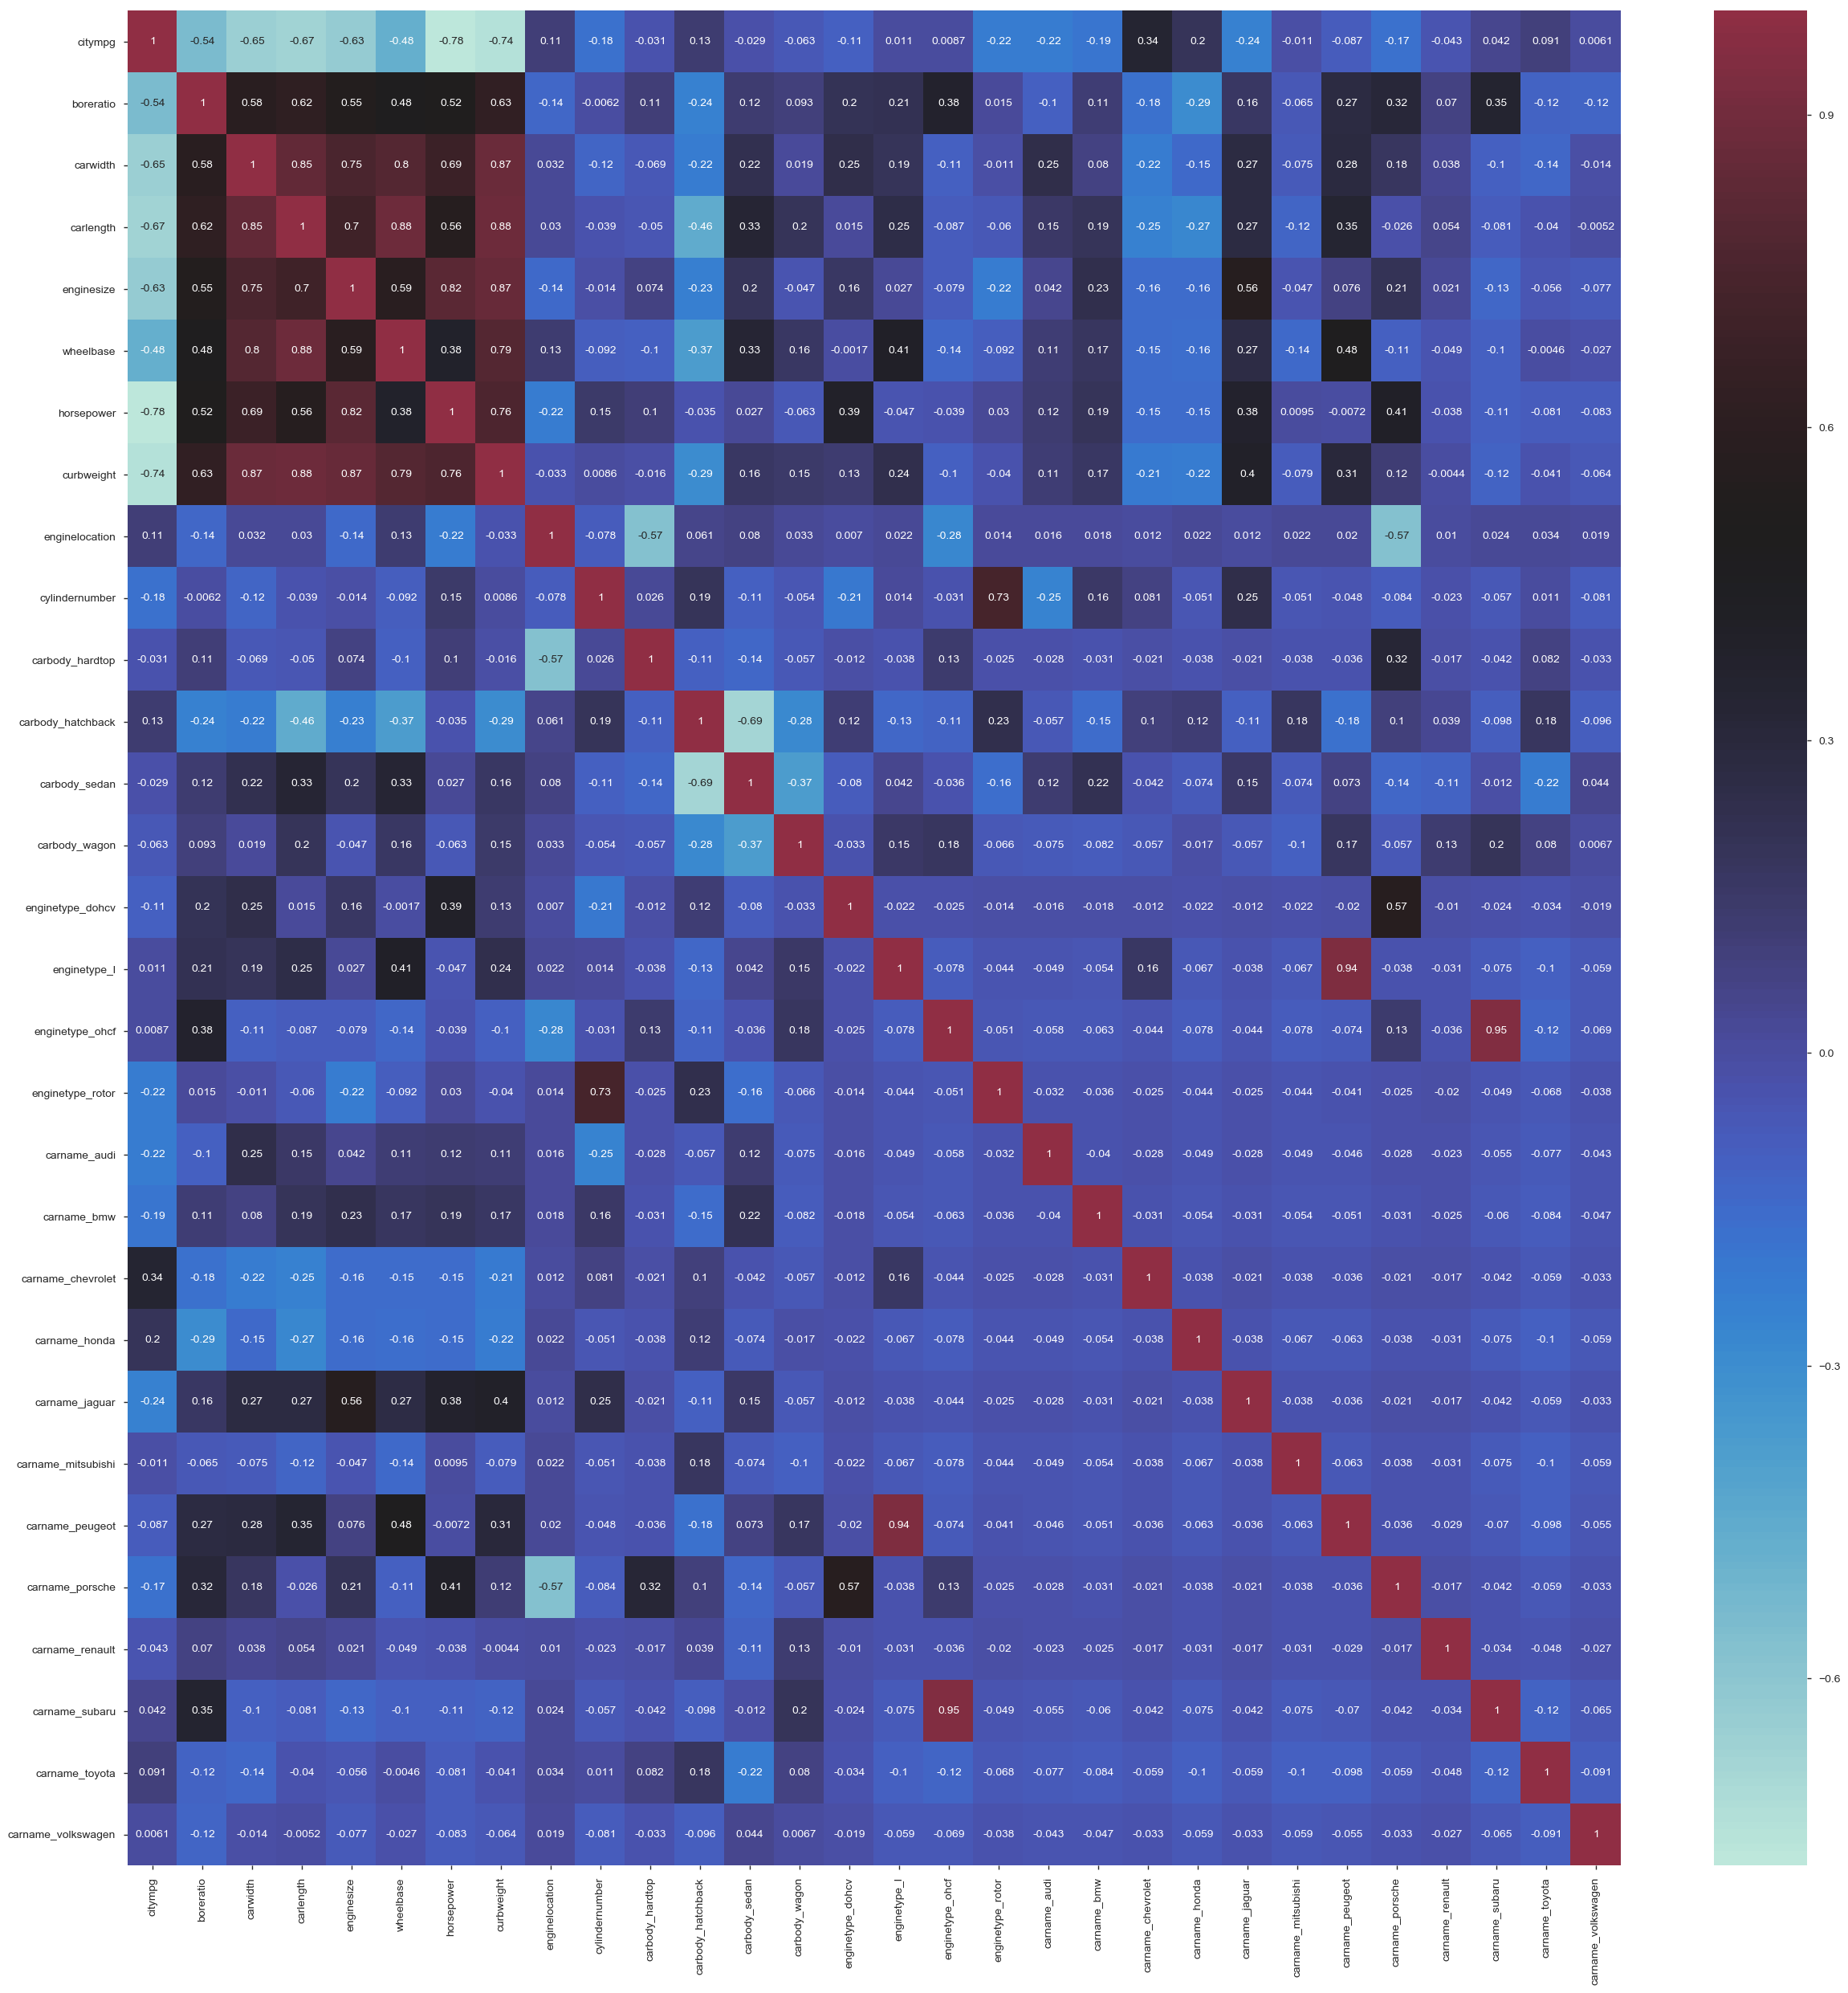

In [1915]:
plt.figure(figsize=(30, 30))
corr = X_train.corr()
sns.heatmap(corr, annot=True, center=0.5)
plt.show()

Before creating model let's try to remove variables that are dependent on each other, as we can see from above heat map there are variables which are correlated with each other. Let's analyse them and take only one among the related variables.
- curbweight, horsepower, wheelbase, carlength, carwidth and enginesize seems to be related to each other
    - curbweight can explain carlength, carwidth, horsepower and wheelbase. Horsepower may be linearly dependent on curbweight.
- cylindernumber and enginetype_rotor has high correlation
    - We will conside cylinder number as it will be easy for interpretation
- enginetype_i is related to carname_peugot
    - We will take enginetype_i as engine type is general, carname peugot may have enginetype_i only that's why dependency
- enginetype_ohcf is related to carname_subaru
    - Here we will consider enginetype_ohcf for the above same reason

In [1916]:
#cols = ['carlength', 'wheelbase', 'carwidth', 'enginesize', 'enginetype_rotor', 
        #'carname_peugeot', 'carname_subaru','horsepower']
#X_train = X_train.drop(columns = cols)

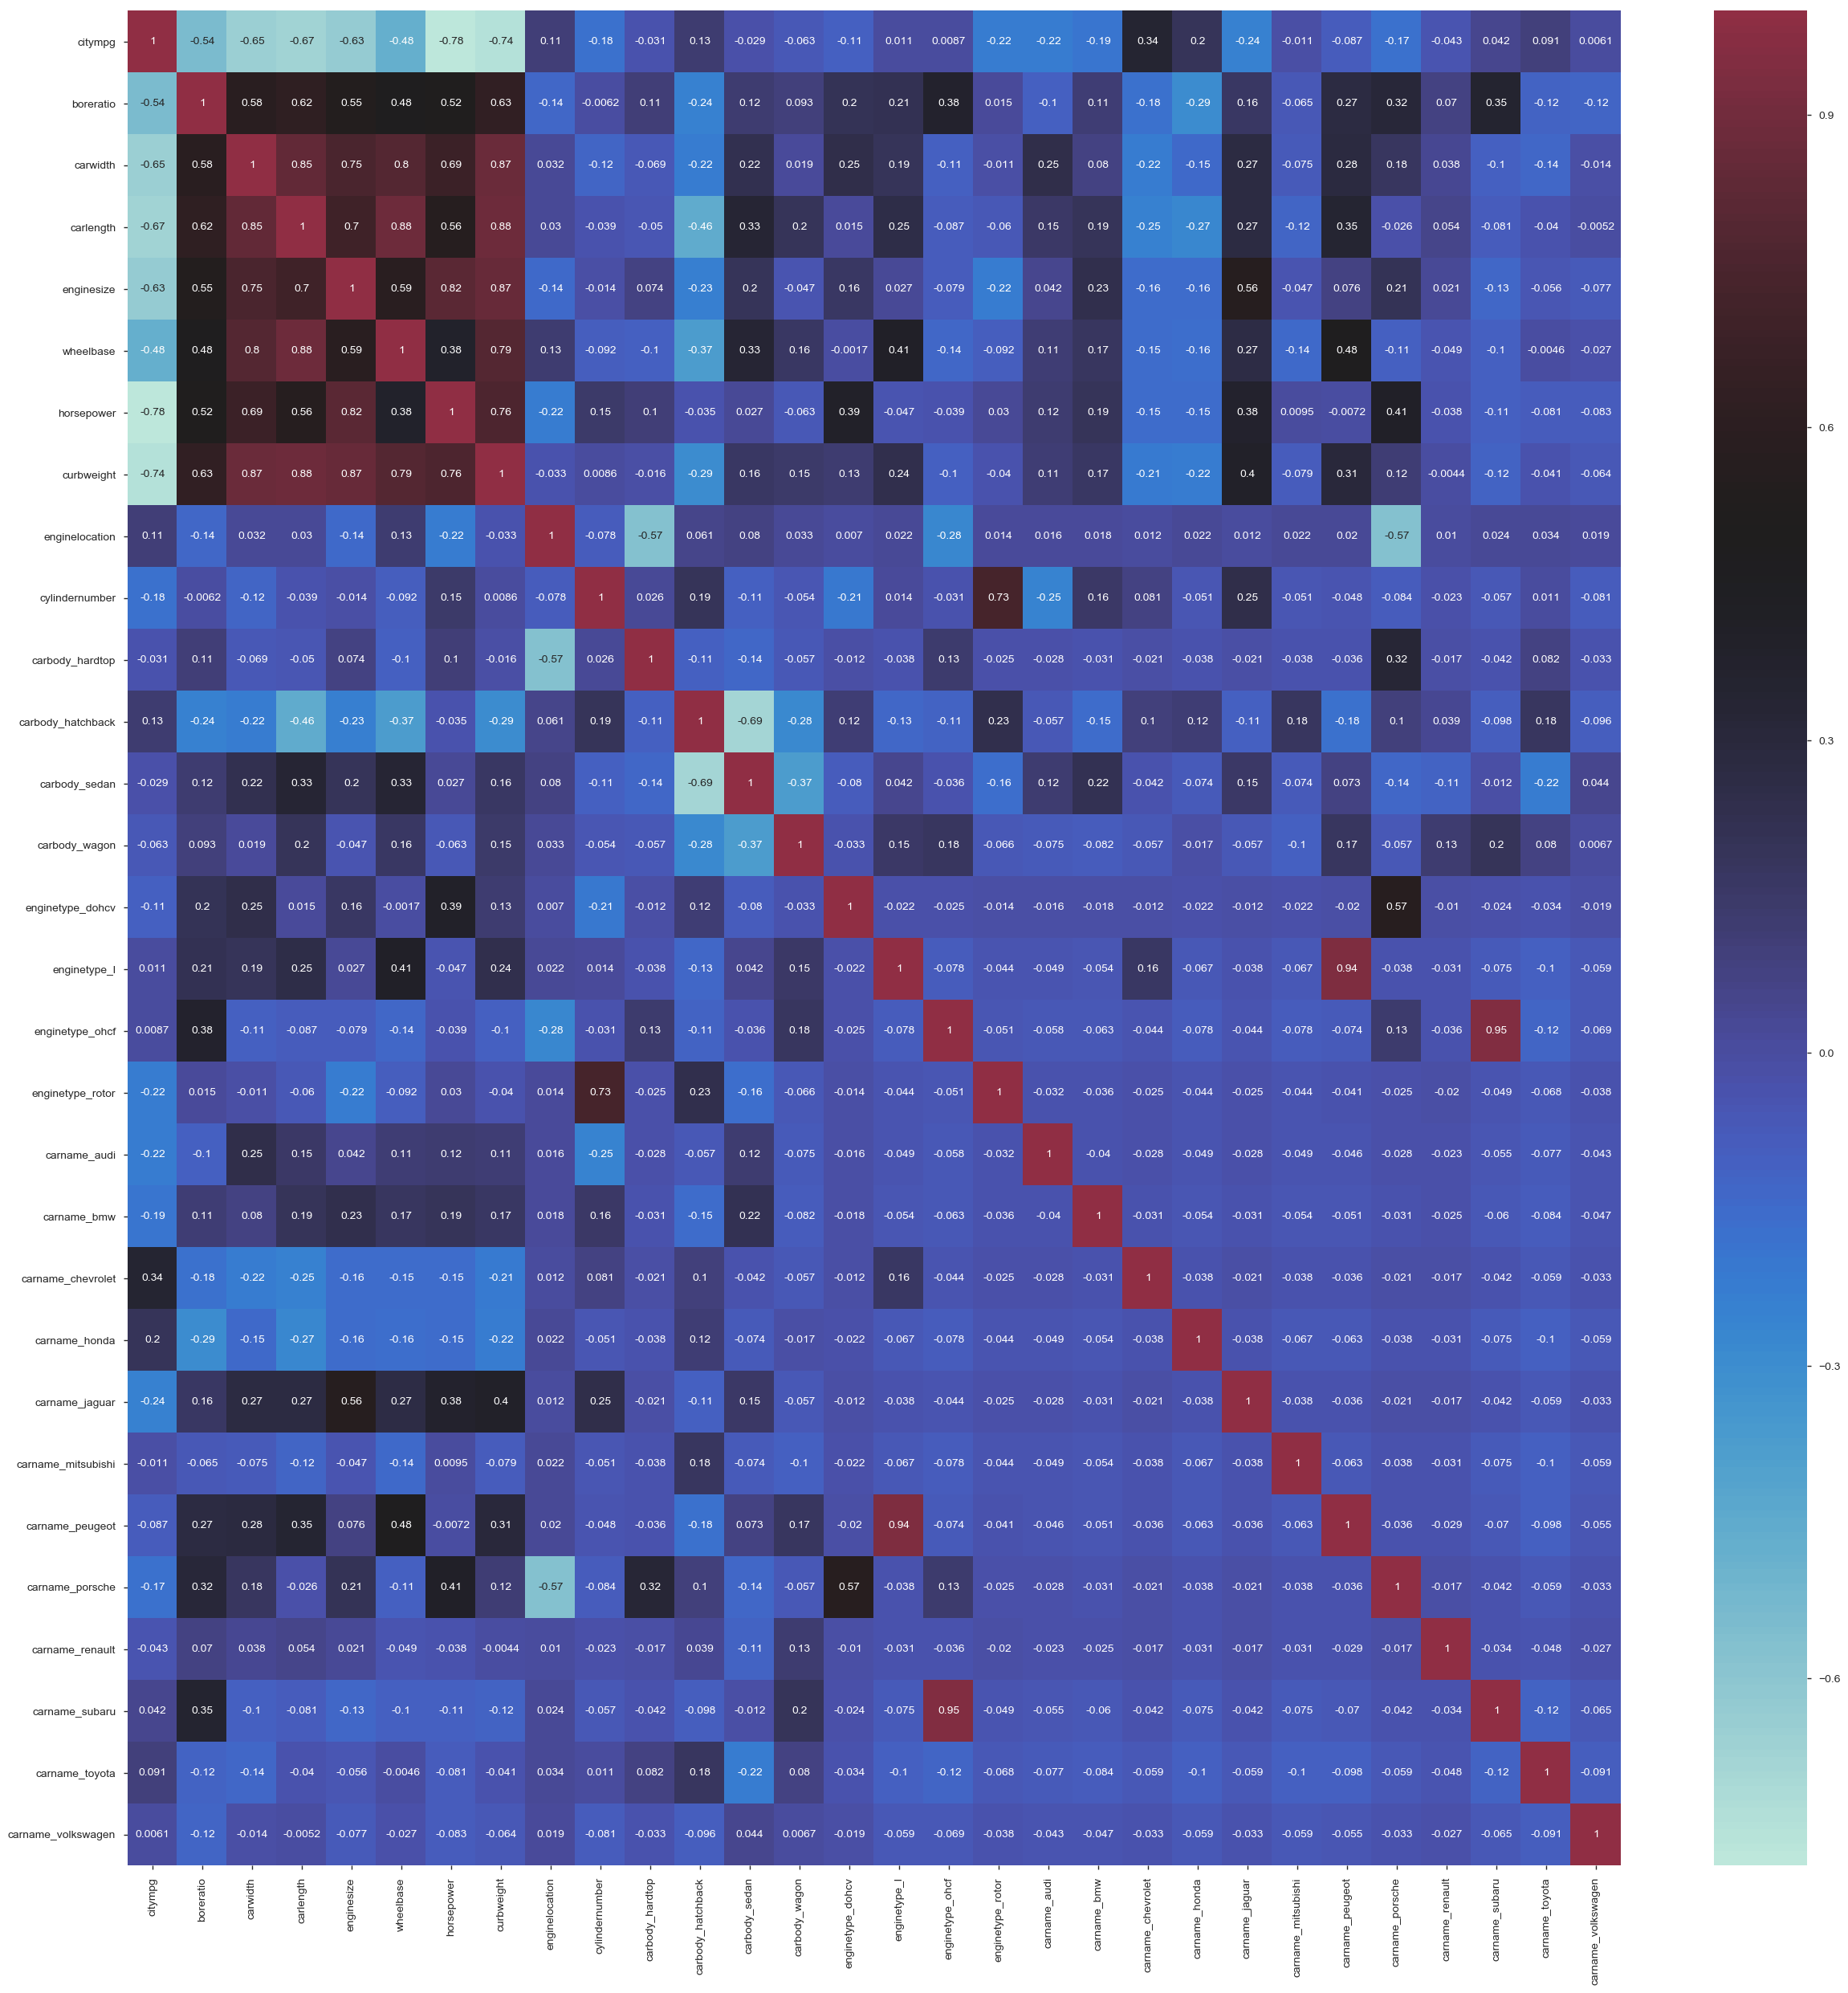

In [1917]:
#now we are left with 22 columns, lets take corelation between them again
plt.figure(figsize=(30, 30))
corr = X_train.corr()
sns.heatmap(corr, annot=True, center=0.5)
plt.show()

- Now we can see the variables look mostly independent, just their is some relation between curweight and citympg. These two variables looks important for now. Hence considering them both for now. We will compare their VIF later.
- Also boreration needs to be checked upon for multicollinearity.

#### Let's now use the above selected feature using RFE and build linear model

In [1918]:
def create_model(pred_train):
    X_train_lm = sm.add_constant(pred_train)
    lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
    print(lr_1.summary())

def calculate_vif(pred_train):
    vif = pd.DataFrame()
    vif['Features'] = pred_train.columns
    vif['VIF'] = [variance_inflation_factor(pred_train.values, i) for i in range(pred_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#### Model 1

In [1919]:
X_train.head()

citympg  boreratio  carwidth  carlength  enginesize  wheelbase  \
0  0.500000   0.230159  0.291667   0.426016    0.139623   0.244828   
1  0.166667   1.000000  0.666667   0.452033    0.339623   0.272414   
2  0.361111   0.444444  0.308333   0.448780    0.139623   0.272414   
3  0.222222   0.626984  0.316667   0.450407    0.260377   0.068966   
4  0.111111   0.746032  0.575000   0.775610    0.260377   0.610345   

   horsepower  curbweight  enginelocation  cylindernumber  carbody_hardtop  \
0    0.083333    0.272692               1        0.333333                0   
1    0.395833    0.500388               1        0.333333                0   
2    0.266667    0.314973               1        0.333333                0   
3    0.262500    0.411171               1        0.333333                0   
4    0.475000    0.647401               1        0.333333                0   

   carbody_hatchback  carbody_sedan  carbody_wagon  enginetype_dohcv  \
0                  0              1              0                 0   
1                  1              0              0                 0   
2                  1              0              0                 0   
3                  0              0              0                 0   
4                  0              0              1                 0   

   enginetype_l  enginetype_ohcf  enginetype_rotor  carname_audi  carname_bmw  \
0             0                0                 0             0            0   
1             0                0                 0             0            0   
2             0                0                 0             0            0   
3             0                0                 0             0            0   
4             0                0                 0             0            0   

   carname_chevrolet  carname_honda  carname_jaguar  carname_mitsubishi  \
0                  0              0               0                   0   
1                  0              0               0                   0   
2                  0              0               0                   0   
3                  0              0               0                   0   
4                  0              0               0                   0   

   carname_peugeot  carname_porsche  carname_renault  carname_subaru  \
0                0                0                0               0   
1                0                1                0               0   
2                0                0                0               0   
3                0                0                0               0   
4                0                0                0               0   

   carname_toyota  carname_volkswagen  
0               0                   0  
1               0                   0  
2               1                   0  
3               0                   0  
4               0                   0

In [1920]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     83.57
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.41e-63
Time:                        02:11:52   Log-Likelihood:                -1261.6
No. Observations:                 143   AIC:                             2583.
Df Residuals:                     113   BIC:                             2672.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.116e+04   2113

#### Model 2

In [1921]:
X_train = X_train.drop(columns = ['carlength'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     85.32
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.93e-64
Time:                        02:11:52   Log-Likelihood:                -1263.2
No. Observations:                 143   AIC:                             2584.
Df Residuals:                     114   BIC:                             2670.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.034e+04   2063

In [1922]:
X_train = X_train.drop(columns = ['enginesize'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     88.13
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.86e-64
Time:                        02:11:52   Log-Likelihood:                -1264.1
No. Observations:                 143   AIC:                             2584.
Df Residuals:                     115   BIC:                             2667.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.044e+04   2065

In [1923]:
X_train = X_train.drop(columns = ['wheelbase'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     89.64
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.54e-65
Time:                        02:11:53   Log-Likelihood:                -1266.1
No. Observations:                 143   AIC:                             2586.
Df Residuals:                     116   BIC:                             2666.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.054e+04   2084

In [1924]:
X_train = X_train.drop(columns = ['carname_chevrolet'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     93.77
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.13e-65
Time:                        02:11:53   Log-Likelihood:                -1266.3
No. Observations:                 143   AIC:                             2585.
Df Residuals:                     117   BIC:                             2662.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.061e+04   2074

In [1925]:
X_train = X_train.drop(columns = ['carname_honda'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     96.97
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.70e-66
Time:                        02:11:53   Log-Likelihood:                -1267.3
No. Observations:                 143   AIC:                             2585.
Df Residuals:                     118   BIC:                             2659.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.033e+04   2071

In [1926]:
X_train = X_train.drop(columns = ['carname_renault'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     100.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.45e-67
Time:                        02:11:53   Log-Likelihood:                -1268.6
No. Observations:                 143   AIC:                             2585.
Df Residuals:                     119   BIC:                             2656.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.005e+04   2071

In [1927]:
X_train = X_train.drop(columns = ['carname_volkswagen'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     103.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.78e-67
Time:                        02:11:53   Log-Likelihood:                -1269.7
No. Observations:                 143   AIC:                             2585.
Df Residuals:                     120   BIC:                             2654.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9524.2382   2041

In [1928]:
X_train = X_train.drop(columns = ['carname_toyota'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     107.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.49e-68
Time:                        02:11:53   Log-Likelihood:                -1271.3
No. Observations:                 143   AIC:                             2587.
Df Residuals:                     121   BIC:                             2652.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9778.1105   2050

In [1929]:
X_train = X_train.drop(columns = ['carname_audi'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.25e-68
Time:                        02:11:53   Log-Likelihood:                -1273.3
No. Observations:                 143   AIC:                             2589.
Df Residuals:                     122   BIC:                             2651.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9022.3618   2029

In [1930]:
X_train = X_train.drop(columns = ['boreratio'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     114.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.30e-68
Time:                        02:11:54   Log-Likelihood:                -1275.1
No. Observations:                 143   AIC:                             2590.
Df Residuals:                     123   BIC:                             2649.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9031.5310   2045

In [1931]:
X_train = X_train.drop(columns = ['enginelocation'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     114.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.30e-68
Time:                        02:11:55   Log-Likelihood:                -1275.1
No. Observations:                 143   AIC:                             2590.
Df Residuals:                     123   BIC:                             2649.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2516.0657   1587

In [1932]:
X_train = X_train.drop(columns = ['carwidth'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     100.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.84e-65
Time:                        02:11:55   Log-Likelihood:                -1287.4
No. Observations:                 143   AIC:                             2613.
Df Residuals:                     124   BIC:                             2669.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3886.3841   1696

In [1933]:
X_train = X_train.drop(columns = ['enginetype_ohcf'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     98.26
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.44e-64
Time:                        02:11:55   Log-Likelihood:                -1293.6
No. Observations:                 143   AIC:                             2623.
Df Residuals:                     125   BIC:                             2676.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3550.2760   1760

In [1934]:
X_train = X_train.drop(columns = ['carbody_hardtop'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.58e-64
Time:                        02:11:55   Log-Likelihood:                -1294.2
No. Observations:                 143   AIC:                             2622.
Df Residuals:                     126   BIC:                             2673.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2991.9144   1681

In [1935]:
X_train = X_train.drop(columns = ['carname_subaru'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     110.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.78e-65
Time:                        02:11:55   Log-Likelihood:                -1294.9
No. Observations:                 143   AIC:                             2622.
Df Residuals:                     127   BIC:                             2669.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2760.3436   1670

In [1936]:
X_train = X_train.drop(columns = ['cylindernumber'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     92.97
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.37e-60
Time:                        02:12:22   Log-Likelihood:                -1311.5
No. Observations:                 143   AIC:                             2653.
Df Residuals:                     128   BIC:                             2698.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -532.3006   1756

In [1937]:
X_train = X_train.drop(columns = ['enginetype_l'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     99.71
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.24e-60
Time:                        02:12:41   Log-Likelihood:                -1312.3
No. Observations:                 143   AIC:                             2653.
Df Residuals:                     129   BIC:                             2694.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -885.1916   1733

In [1938]:
X_train = X_train.drop(columns = ['carname_jaguar'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.16e-61
Time:                        02:13:22   Log-Likelihood:                -1313.4
No. Observations:                 143   AIC:                             2653.
Df Residuals:                     130   BIC:                             2691.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1629.9439   1658

In [1939]:
X_train = X_train.drop(columns = ['carname_mitsubishi'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     113.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.97e-61
Time:                        02:14:01   Log-Likelihood:                -1315.6
No. Observations:                 143   AIC:                             2655.
Df Residuals:                     131   BIC:                             2691.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1891.8544   1671.65

In [1942]:
X_train = X_train.drop(columns = ['horsepower'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     115.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.21e-60
Time:                        02:16:27   Log-Likelihood:                -1321.6
No. Observations:                 143   AIC:                             2665.
Df Residuals:                     132   BIC:                             2698.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               187.2739   1615.46

In [1944]:
X_train = X_train.drop(columns = ['enginetype_dohcv'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     127.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.24e-61
Time:                        02:17:12   Log-Likelihood:                -1322.0
No. Observations:                 143   AIC:                             2664.
Df Residuals:                     133   BIC:                             2694.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               436.3683   1588.32

In [1946]:
X_train = X_train.drop(columns = ['carbody_sedan'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.87e-60
Time:                        02:18:16   Log-Likelihood:                -1326.0
No. Observations:                 143   AIC:                             2670.
Df Residuals:                     134   BIC:                             2697.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1773.3702   1411.43

In [1948]:
X_train = X_train.drop(columns = ['citympg'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     152.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.21e-61
Time:                        02:19:29   Log-Likelihood:                -1327.9
No. Observations:                 143   AIC:                             2672.
Df Residuals:                     135   BIC:                             2695.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               633.2719    593.42

In [1950]:
X_train = X_train.drop(columns = ['enginetype_rotor'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     175.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.95e-61
Time:                        02:20:47   Log-Likelihood:                -1329.2
No. Observations:                 143   AIC:                             2672.
Df Residuals:                     136   BIC:                             2693.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               602.9817    596.17

In [1952]:
X_train = X_train.drop(columns = ['carbody_hatchback'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_1.summary())
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     206.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.56e-62
Time:                        02:21:52   Log-Likelihood:                -1330.7
No. Observations:                 143   AIC:                             2673.
Df Residuals:                     137   BIC:                             2691.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              50.3633    506.061     

In [1953]:
y_train_price = lr_1.predict(X_train_lm)

Text(0.5, 0, 'Errors')

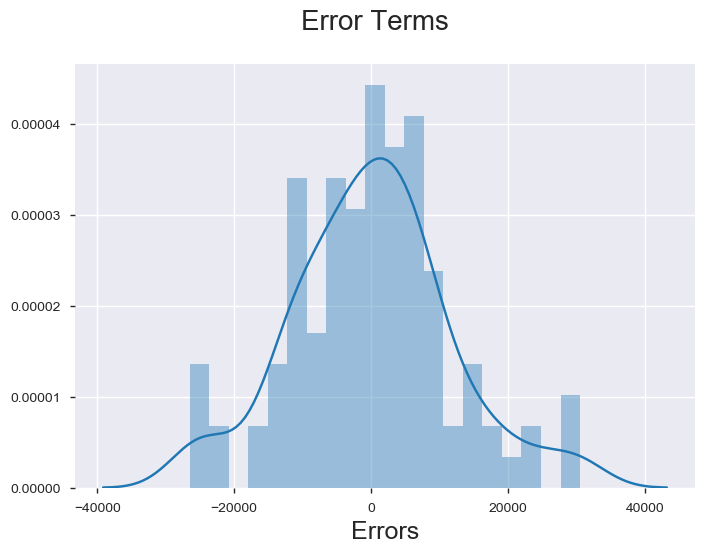

In [1954]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [1955]:
vars_tobescaled = ['citympg', 'boreratio', 'carwidth', 'carlength', 'enginesize', 'wheelbase', 'horsepower', 'curbweight', 
                   'symboling','cylindernumber']
df_test[vars_tobescaled] = scaler.transform(df_test[vars_tobescaled])

In [1956]:
df_test.head()

citympg  boreratio  carwidth  carlength  enginesize  wheelbase  \
160  0.694444   0.404762  0.341667   0.409756    0.139623   0.313793   
186  0.388889   0.404762  0.433333   0.497561    0.181132   0.368966   
59   0.361111   0.563492  0.516667   0.596748    0.230189   0.420690   
165  0.361111   0.444444  0.308333   0.448780    0.139623   0.272414   
140  0.361111   0.746032  0.291667   0.263415    0.177358   0.231034   

     horsepower  curbweight  fueltype  aspiration  enginelocation  symboling  \
160    0.091667    0.235066         1           1               1        0.4   
186    0.154167    0.305275         1           1               1        0.8   
59     0.150000    0.347944         1           1               1        0.6   
165    0.266667    0.301396         1           1               1        0.6   
140    0.104167    0.291699         1           1               1        0.8   

     cylindernumber   price  drivewheel_fwd  drivewheel_rwd  carbody_hardtop  \
160        0.333333  7738.0               1               0                0   
186        0.333333  8495.0               1               0                0   
59         0.333333  8845.0               1               0                0   
165        0.333333  9298.0               0               1                0   
140        0.333333  7603.0               0               0                0   

     carbody_hatchback  carbody_sedan  carbody_wagon  enginetype_dohcv  \
160                  0              1              0                 0   
186                  0              1              0                 0   
59                   1              0              0                 0   
165                  0              1              0                 0   
140                  1              0              0                 0   

     enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \
160             0               1                0                0   
186             0               1                0                0   
59              0               1                0                0   
165             0               0                0                0   
140             0               0                1                0   

     enginetype_rotor  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
160                 0                1                0               0   
186                 0                0                0               0   
59                  0                1                0               0   
165                 0                0                0               0   
140                 0                1                0               0   

     fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
160               0                0                0                0   
186               0                1                0                0   
59                0                0                0                0   
165               0                1                0                0   
140               0                0                0                0   

     carname_audi  carname_bmw  carname_buick  carname_chevrolet  \
160             0            0              0                  0   
186             0            0              0                  0   
59              0            0              0                  0   
165             0            0              0                  0   
140             0            0              0                  0   

     carname_dodge  carname_honda  carname_isuzu  carname_jaguar  \
160              0              0              0               0   
186              0              0              0               0   
59               0              0              0               0   
165              0              0              0               0   
140              0              0              0               0   

     carname_mazda  carna

In [1957]:
y_test = df_test.pop('price')

In [1958]:
X_test = df_test

In [1959]:
X_test_lm = X_test[X_train.columns]

In [1960]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test_lm)

In [1961]:
# Making predictions using the fourth model

y_test_price = lr_1.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

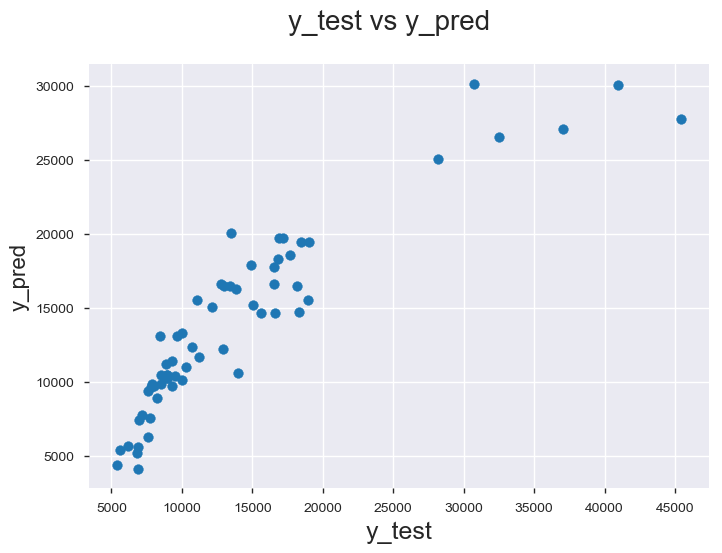

In [1962]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_price)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [1963]:
r2_score(y_test, y_test_price)

0.8008870034292002